## Fit execution time

This is connected to FLIP [#753](https://github.com/onflow/flow/pull/753)

`execution_effort/execution_time` should (on average) be a constant that only depends on the machine running the transactions, and not the transactions themselves.

We can set `execution_effort/execution_time=1` for the calibration machine.

the collected data has the first column as the transaction identifier (the transaction type) and the last column as the actual execution time in ms. The other columns are features.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import pearsonr
from sklearn import linear_model
from sklearn import model_selection
import statsmodels.api as sm


In [ ]:
data11 = pd.read_csv("data/11032022-machine1-1.txt")
data12 = pd.read_csv("data/11032022-machine1-2.txt")
data13 = pd.read_csv("data/11032022-machine1-3.txt")
data14 = pd.read_csv("data/11032022-machine1-4.txt")
data15 = pd.read_csv("data/11032022-machine1-5.txt")
data21 = pd.read_csv("data/11032022-machine2-1.txt")
data22 = pd.read_csv("data/11032022-machine2-2.txt")
data23 = pd.read_csv("data/11032022-machine2-3.txt")
data24 = pd.read_csv("data/11032022-machine2-4.txt")

test_data1 = pd.read_csv("data/11032022-testnet.csv")
test_data2 = pd.read_csv("data/14032022-testnet.csv")

In [ ]:
temp1=pd.concat([data11,data12,data13,data14,data15])
temp1['source']='machine1'
temp2=pd.concat([data21,data22,data23,data24])
temp2['source']='machine2'
test=pd.concat([test_data1,test_data2])
test['source']='testnet'



data=pd.concat([temp1,temp2])
data.reset_index()
data_all=pd.concat([temp1,temp2,test])


In [ ]:
data=data.reset_index()


In [ ]:
data_all.groupby('source').count()['tx']

In [ ]:
# data_all.to_pickle("./data/data_all.pkl")

In [ ]:
len(data.columns)

In [ ]:
len(test.columns)

In [ ]:
set(test.columns)-set(data.columns)

In [ ]:
set(data.columns) - set(test.columns)

# EDAcolumns

In [ ]:
# data2['num_txn'] = [2 if '+' in str(i) else 1 for i in data['tx'].values]
# data2['txn_type1']=[str(i).split(' + ')[0] for i in data['tx'].values]
# data2['txn_type2']=[str(i).split(' + ')[1] if len(str(i).split(' + '))>1 else None for i in data['tx'].values]
data2=data

### Summary

##### simulated data

In [ ]:
data2.describe()

##### testnet data

In [ ]:
data_all.loc[data_all.source=='testnet']

### history of ms

In [ ]:
plt.plot(data2.ms)

In [ ]:
plt.plot(test.ms)

## Univariate Plot 

### simulated data

In [ ]:
corr_out={}
plot_data=data

features=plot_data.columns
removal=['tx','ResolveLocation','SetProgram','ProgramParsed','ValueDecoded','ProgramChecked','ms','source']
features=list(set(features)-set(removal))
    
for feature in sorted(features):
    fig=plt.figure(figsize=(6, 4), dpi=80)
    plt.xlabel(feature)
    plt.ylabel("ms")
    plt.scatter(plot_data[feature],plot_data.ms,s=1)
    corr, _ = pearsonr(plot_data[feature],plot_data.ms)
    corr_out[feature]=corr
    plt.title(feature+"'s correlation is: " + str(corr))
#     corr, _ = pearsonr(data[feature],data.ms)

    

###  testnet data

In [ ]:
test.isnull()

In [ ]:
test2=test.fillna(test.mean())

In [ ]:
 pearsonr(plot_data[feature],plot_data.ms)

In [ ]:
corr_out={}
plot_data=test2

features=plot_data.columns
removal=['tx','ResolveLocation','SetProgram','ProgramParsed','ValueDecoded','ProgramChecked','ms','source']
features=list(set(features)-set(removal))
    
for feature in sorted(features):
    fig=plt.figure(figsize=(6, 4), dpi=80)
    plt.xlabel(feature)
    plt.ylabel("ms")
    
    
    plt.scatter(plot_data[feature],plot_data.ms,s=1)
    corr, _ = pearsonr(plot_data[feature],plot_data.ms)
    corr_out[feature]=corr
    plt.title(feature+"'s correlation is: " + str(corr))
#     corr, _ = pearsonr(data[feature],data.ms)

    

In [ ]:
plt.scatter(plot_data['function_or_loop_call'],plot_data.ms,s=1)
pearsonr(plot_data['function_or_loop_call'],plot_data.ms)
corr

In [ ]:
# corr_out={}
# features=data.columns[1:-1]
# for feature in sorted(set(x_features)-set(features)):
#     print(feature+": "+str(data3.groupby(feature).agg({'ms':['count', 'mean']})))
    

In [ ]:
# data2.groupby('ResolveLocation').agg({'ms':['count', 'mean']})
# remove from model

In [ ]:
# data2.groupby('SetProgram').agg({'ms':['count', 'mean']})
# remove from model
# ProgramParsed, ValueDecoded, ProgramChecked cannot be used


In [ ]:
# data2.groupby('txn_type1').agg({'ms':['count', 'mean']})

In [ ]:
# data2.groupby('txn_type2').agg({'ms':['count', 'mean']})

### Correlation against ms

In [ ]:
sorted(corr_out.items(), key=lambda item: item[1],reverse=True)

### Mutual correlation

In [460]:
data2.corr('pearson')

index  SetValue  RevokeEncodedAccountKey  \
index                       1.000000  0.005923                 0.002991   
SetValue                    0.005923  1.000000                -0.038259   
RevokeEncodedAccountKey     0.002991 -0.038259                 1.000000   
AddEncodedAccountKey        0.004192 -0.052909                 0.492636   
EmitEvent                   0.006238 -0.045155                 0.080839   
GetAccountContractCode      0.001086  0.090261                -0.029237   
ContractFunctionInvoke      0.006890  0.002508                -0.067362   
ResolveLocation             0.000439 -0.000284                 0.001175   
GetAccountAvailableBalance  0.005583 -0.035321                -0.028772   
GetValue                    0.006850  0.000934                -0.067638   
GetAccountBalance           0.003332 -0.036582                -0.029471   
GetProgram                  0.006836  0.008712                -0.067522   
GetCode                     0.001086  0.090261                -0.029237   
CreateAccount               0.003044  0.134159                -0.042502   
UpdateAccountContractCode   0.001046  0.090794                -0.029483   
GetStorageUsed              0.006035 -0.033808                -0.029887   
GetStorageCapacity          0.002501  0.013230                -0.042974   
SetProgram                  0.000434 -0.000591                 0.000907   
AllocateStorageIndex        0.007096  0.767692                -0.048103   
GenerateUUID                0.007246  0.912872                -0.044638   
function_or_loop_call       0.015892 -0.088093                -0.106256   
ms                          0.003960  0.084502                 0.065495   

                            AddEncodedAccountKey  EmitEvent  \
index                                   0.004192   0.006238   
SetValue                               -0.052909  -0.045155   
RevokeEncodedAccountKey                 0.492636   0.080839   
AddEncodedAccountKey                    1.000000   0.095752   
EmitEvent                               0.095752   1.000000   
GetAccountContractCode                 -0.041770  -0.009704   
ContractFunctionInvoke                 -0.092725  -0.074692   
ResolveLocation                         0.000649  -0.000871   
GetAccountAvailableBalance             -0.039667  -0.041123   
GetValue                               -0.093167  -0.075518   
GetAccountBalance                      -0.040112  -0.041256   
GetProgram                             -0.092898  -0.073120   
GetCode                                -0.041770  -0.009704   
CreateAccount                          -0.059055  -0.014054   
UpdateAccountContractCode              -0.042016  -0.009627   
GetStorageUsed                         -0.042288  -0.042896   
GetStorageCapacity                     -0.059254  -0.045243   
SetProgram                              0.000270  -0.001234   
AllocateStorageIndex                   -0.066523  -0.062658   
GenerateUUID                           -0.061875   0.008423   
function_or_loop_call                  -0.145492   0.000542   
ms                                      0.093251   0.104717   

                            GetAccountContractCode  ContractFunctionInvoke  \
index                                     0.001086                0.006890   
SetValue                                  0.090261                0.002508   
RevokeEncodedAccountKey                  -0.029237               -0.067362   
AddEncodedAccountKey                     -0.041770               -0.092725   
EmitEvent                                -0.009704               -0.074692   
GetAccountContractCode                    1.000000                0.227554   
ContractFunctionInvoke                    0.227554                1.000000   
ResolveLocation                           0.101966               -0.000041   
GetAccountAvailableBalance               -0.028724                0.475630   
GetValue                                  0.257598                0.997859 

## Outlier detection

In [ ]:
#####  ms=0 records
data2.loc[data2.ms<1]

In [ ]:
#####  ms>3000 records
data2.loc[data2.ms>1000].count()

In [ ]:
outlier_idx=data2.index[(data2.ms>500) | (data2.ms<1)]

In [ ]:
data_no_outlier = data2.loc[set(data2.index)-set(outlier_idx)]

In [ ]:
plt.hist(data_no_outlier.ms)

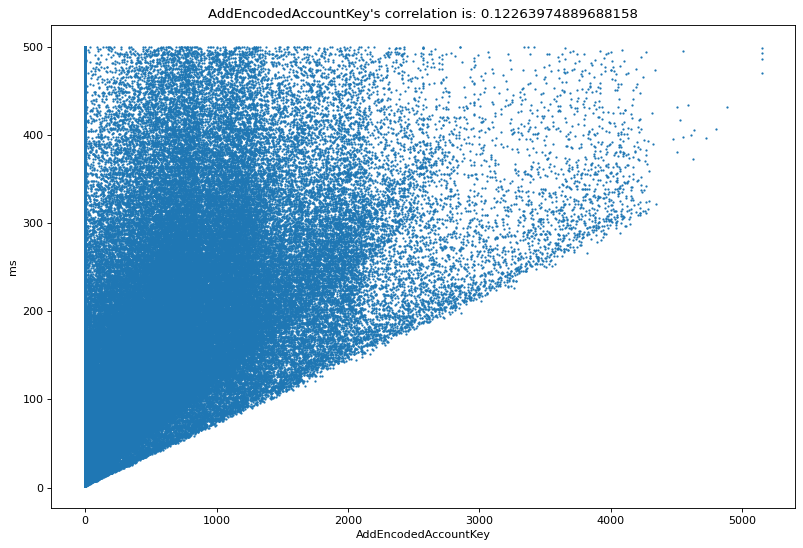

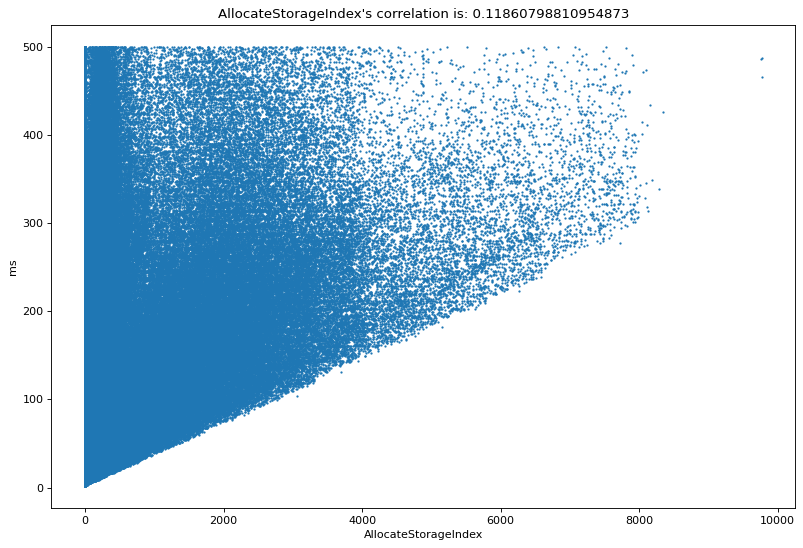

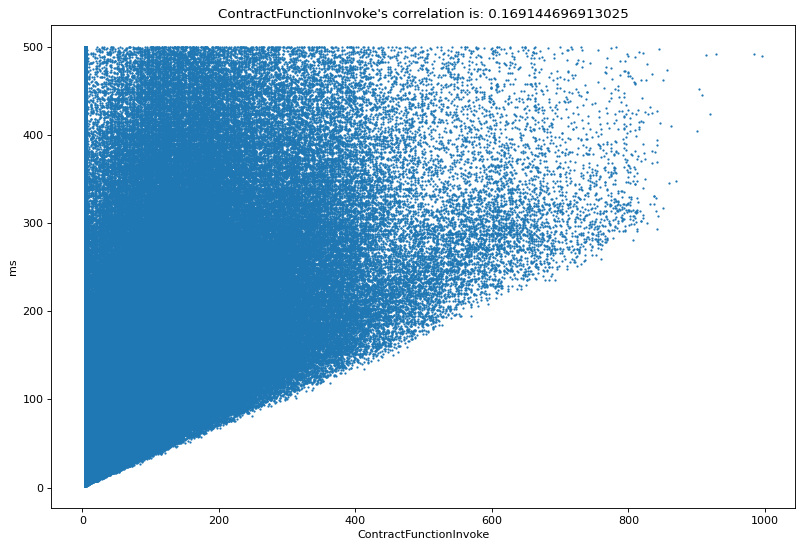

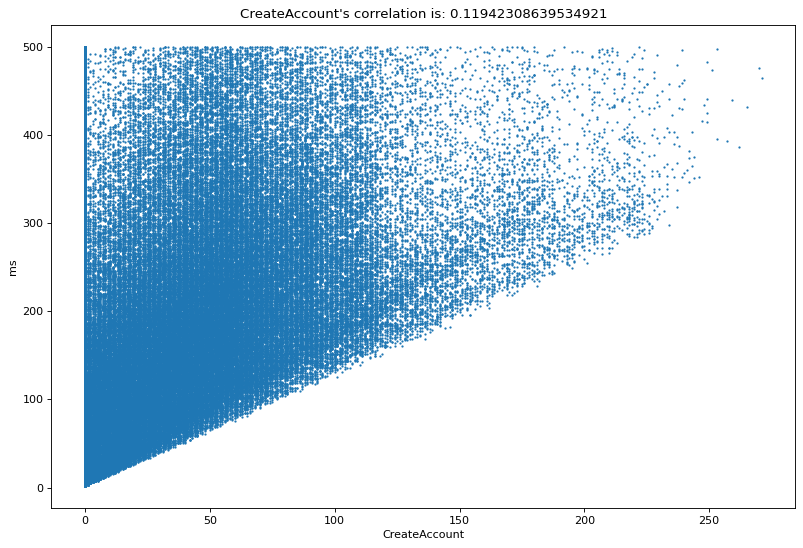

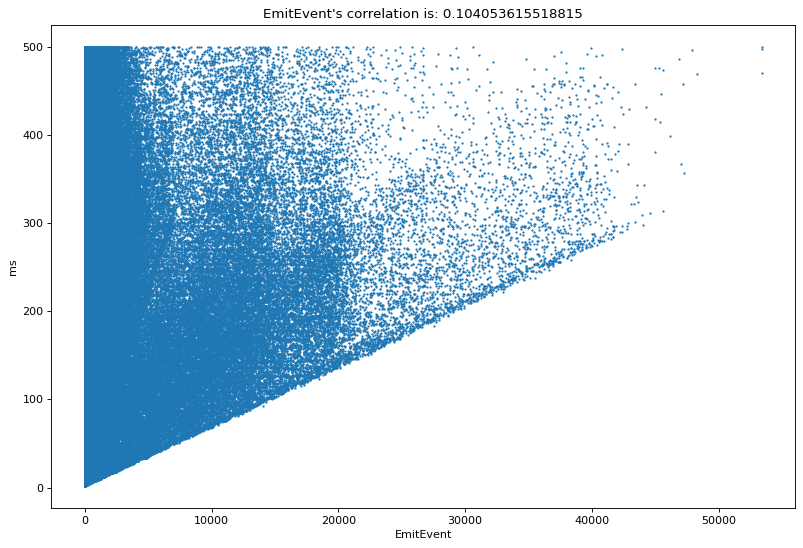

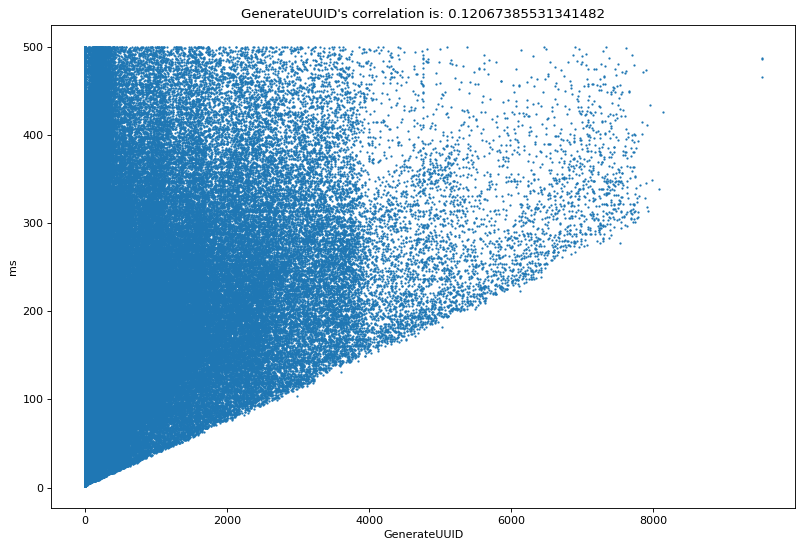

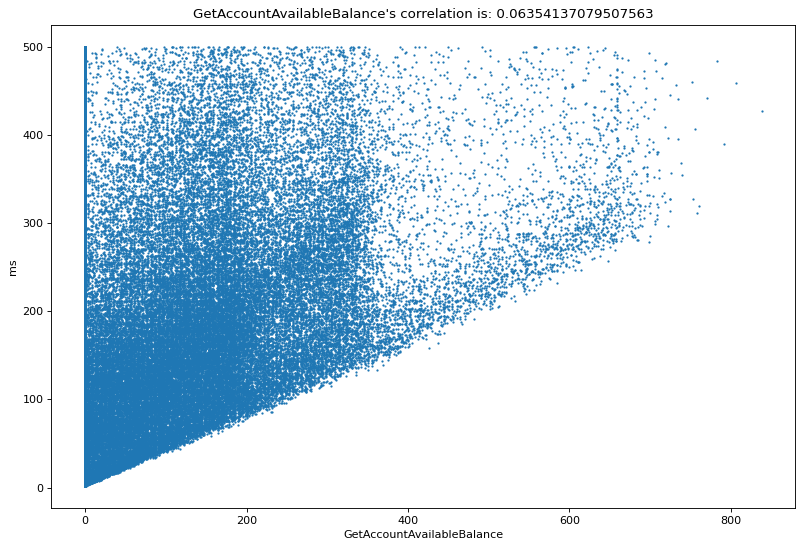

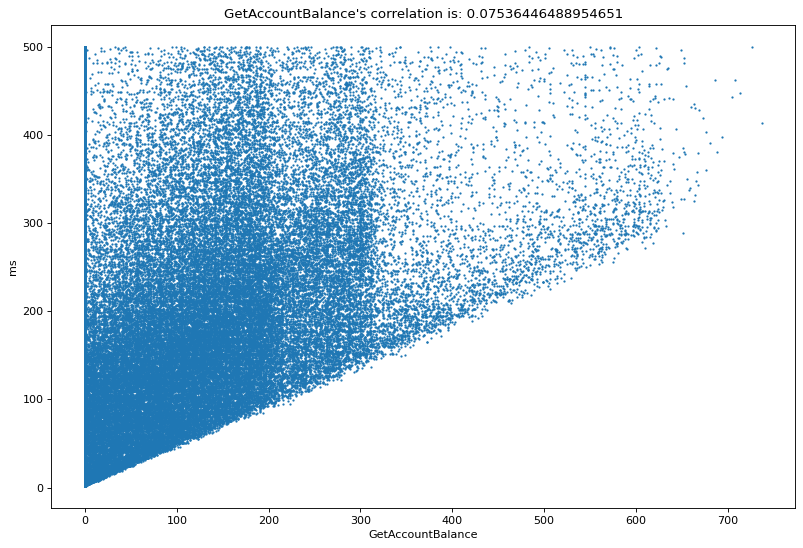

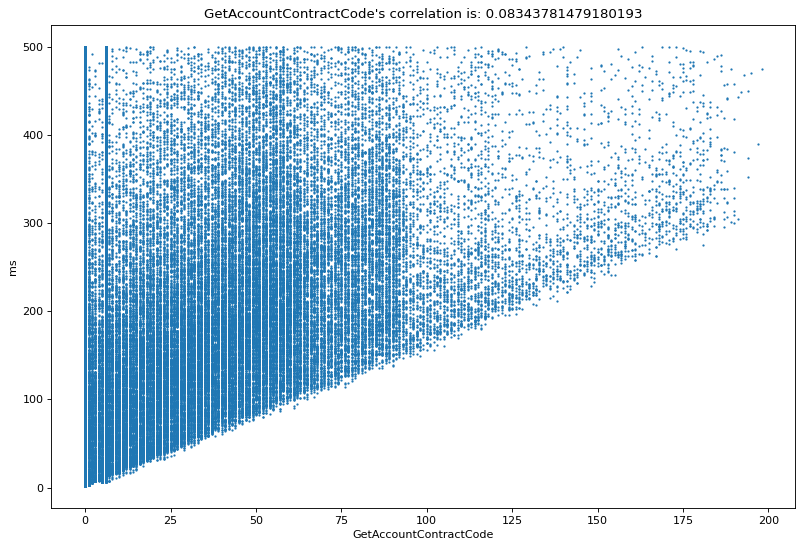

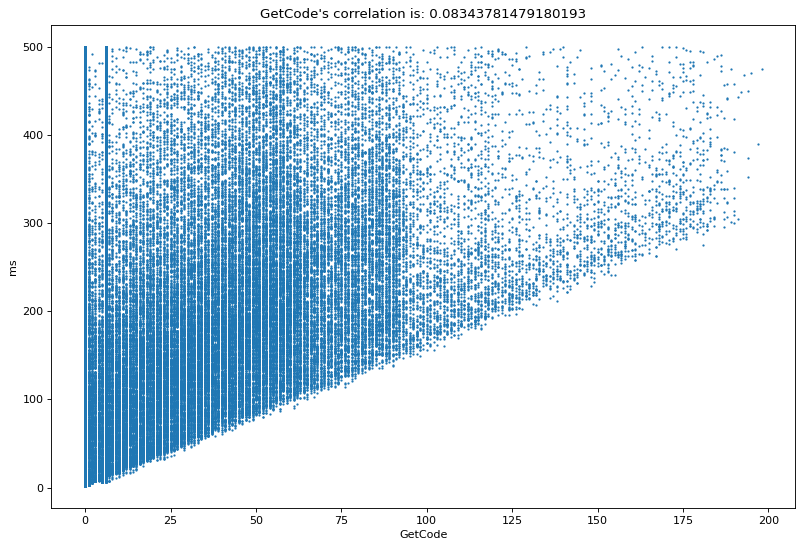

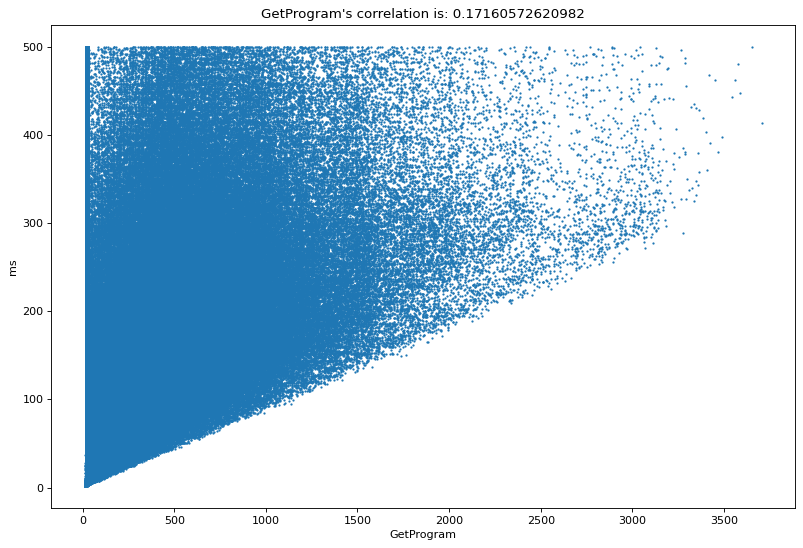

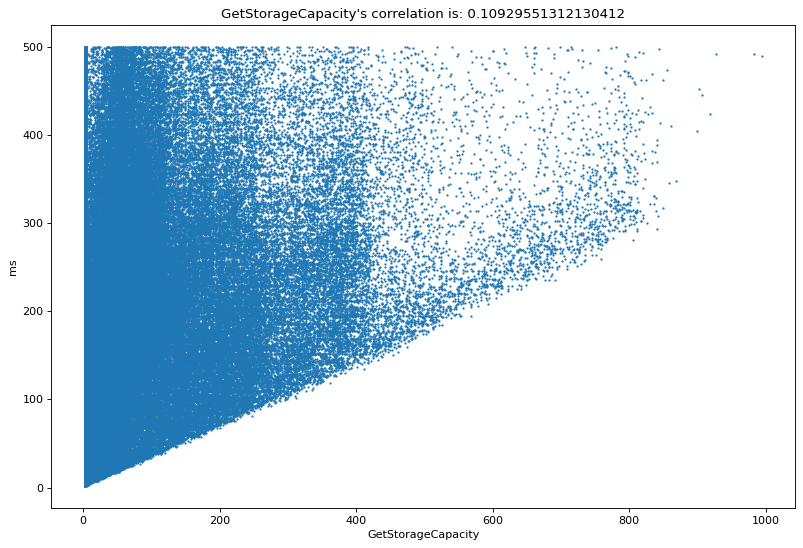

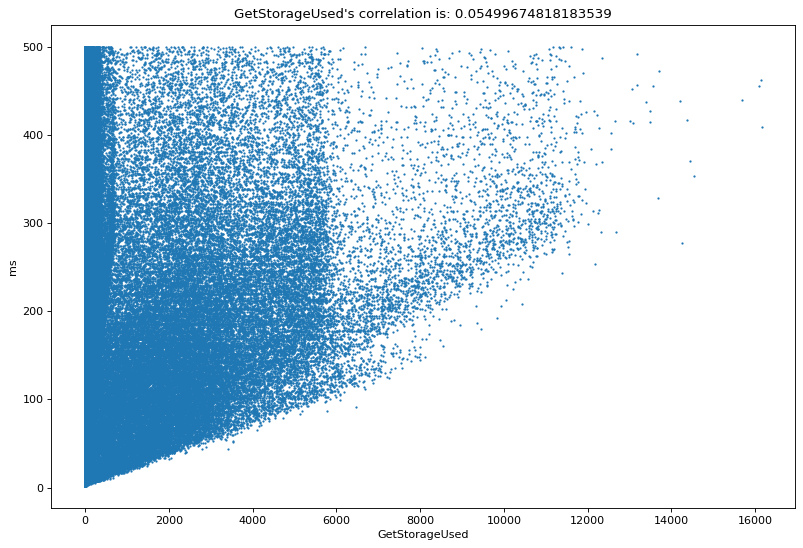

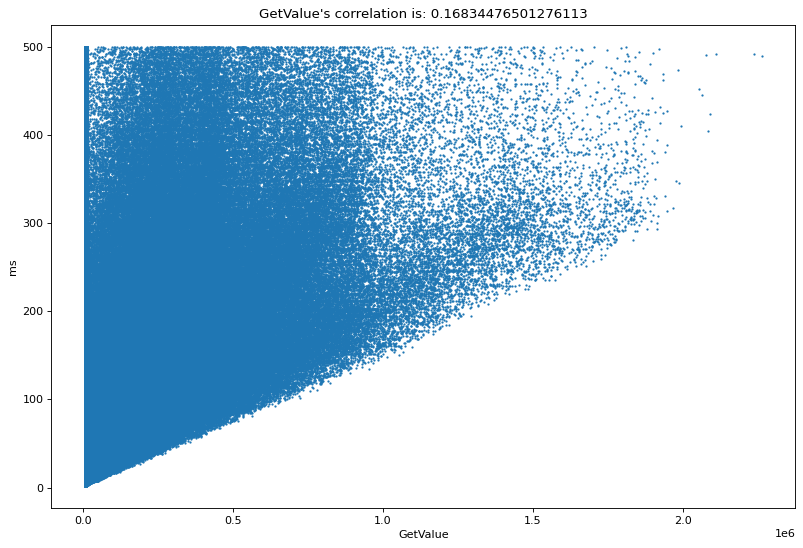

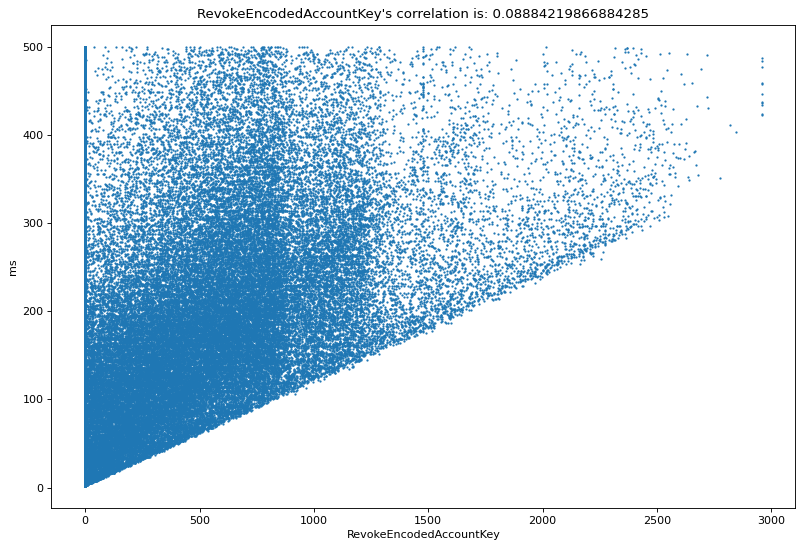

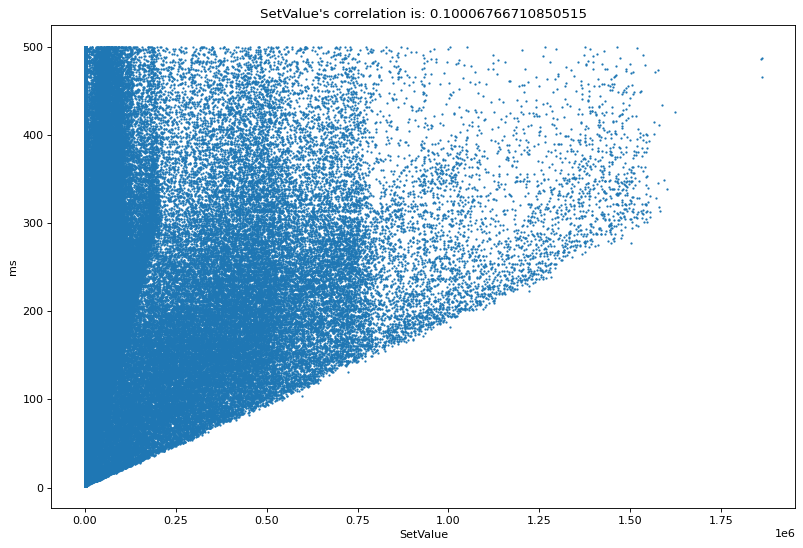

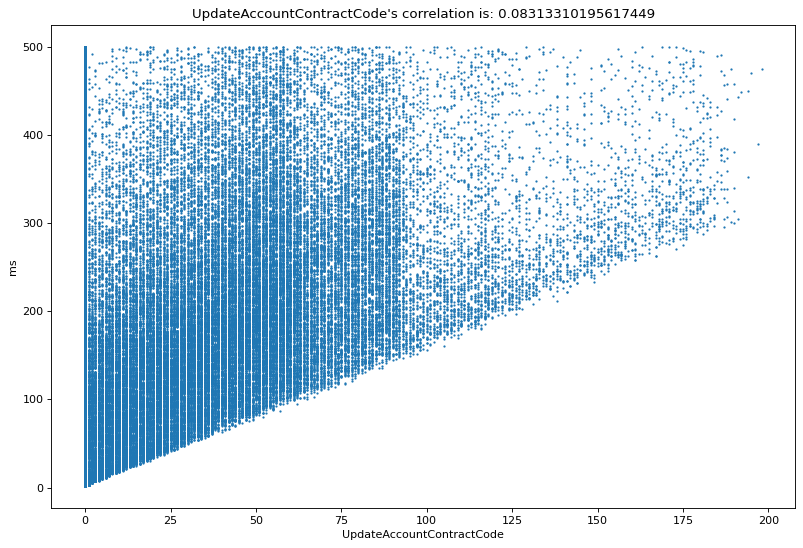

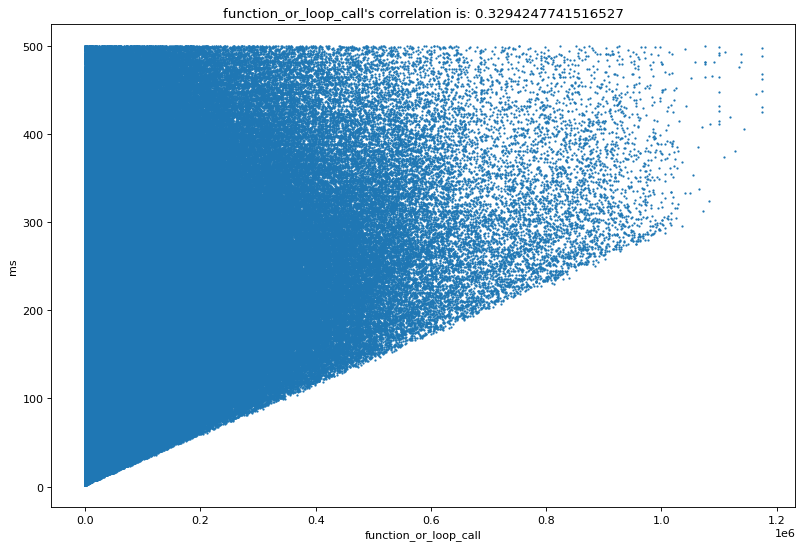

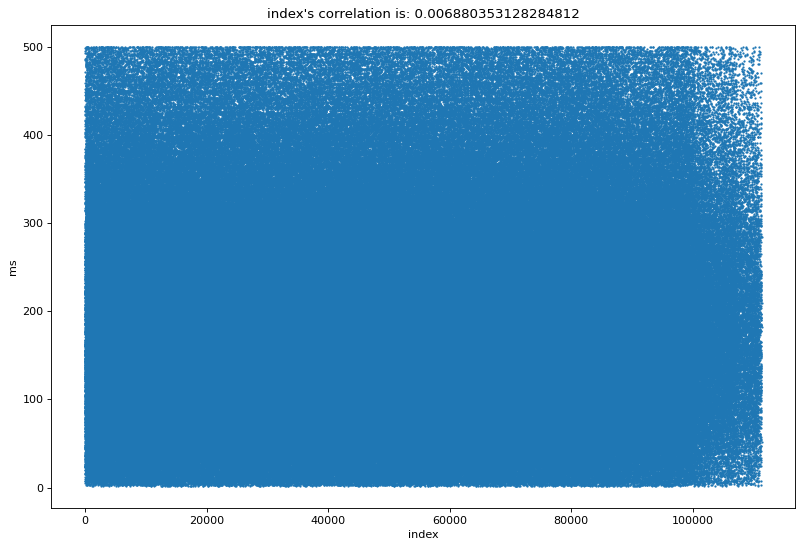

In [465]:
corr_out={}
plot_data=data_no_outlier

features=plot_data.columns
removal=['tx','ResolveLocation','SetProgram','ProgramParsed','ValueDecoded','ProgramChecked','ms','source']
features=list(set(features)-set(removal))
    
for feature in sorted(features):
    fig=plt.figure(figsize=(12, 8), dpi=80)
    plt.xlabel(feature)
    plt.ylabel("ms")
    plt.scatter(plot_data[feature],plot_data.ms,s=1)
    corr, _ = pearsonr(plot_data[feature],plot_data.ms)
    corr_out[feature]=corr
    plt.title(feature+"'s correlation is: " + str(corr))
#     corr, _ = pearsonr(data[feature],data.ms)

    

## Find T0

### method
1. iterate through all the function_or_loop_call
2. for the same function_or_loop_call value, only keep the record with min ms value

3. iterate through all the GetValue
4. for the same GetValue value, only keep the record with min ms value




In [ ]:
t0_idx_list=[]
for i in set(data2.function_or_loop_call):
    records=data2.loc[data2.function_or_loop_call==i].ms
    min_ms=min(records)
    t0_idx_list.append(records[records == min_ms].index[0])

In [ ]:
data3_3=data2.iloc[t0_idx_list]

In [ ]:
len(data3)
# len(data3_3)

In [ ]:
outlier_idx_data3=data3.index[(data3.ms>500) | (data3.ms<1)]

In [ ]:
data3_no_outlier = data3.loc[set(data3.index)-set(outlier_idx_data3)]

In [ ]:
# data3.to_pickle('data/function_or_loop_call_min.pkl')
# data3_1.to_pickle('data/getValue_min.pkl')
# data3_2.to_pickle('data/emitevent_min.pkl')
# data3_3.to_pickle('data/setvalue_min.pkl')

In [ ]:
data3=pd.read_pickle('data/function_or_loop_call_min.pkl')

In [ ]:
t1_idx_list=[]
for i in set(data3.GetValue):
    records=data3.loc[data3.GetValue==i].ms
    min_ms=min(records)
    t1_idx_list.append(records[records == min_ms].index[0])

In [ ]:
data4=data2.iloc[t1_idx_list]

In [459]:
len(data4)

12400

In [ ]:
outlier_idx_data4=data4.index[(data4.ms>500) | (data4.ms<1)]
data4_no_outlier = data4.loc[set(data4.index)-set(outlier_idx_data4)]

In [ ]:
t2_idx_list=[]
for i in set(data2.function_or_loop_call):
    records=data2.loc[(data2.function_or_loop_call==i)].ms
    broader_records=data2.loc[(data2.function_or_loop_call==i) | (data2.function_or_loop_call==(i-5)) | (data2.function_or_loop_call==(i+5))].ms
    min_ms=min(records)
    t2_idx_list.append(records[records == min_ms].index[0])

In [ ]:
data5=data2.iloc[t2_idx_list]

In [ ]:
len(data5)

In [ ]:
len(data3)

In [ ]:
data5.to_pickle('data/function_or_loop_call_min_5.pkl')

In [ ]:
# SetValue - 11562
# EmitEvent -12909
# GetValue - 12400
# function_or_loop_call

In [ ]:
# plt.xlim(0,1000)
plt.hist(data3.ms)

In [ ]:
# plt.xlim(0,1000)
plt.hist(data4.ms)

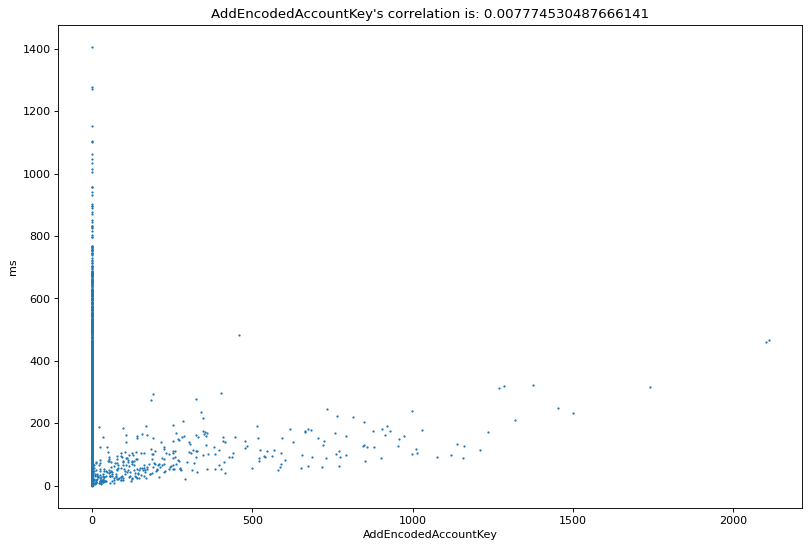

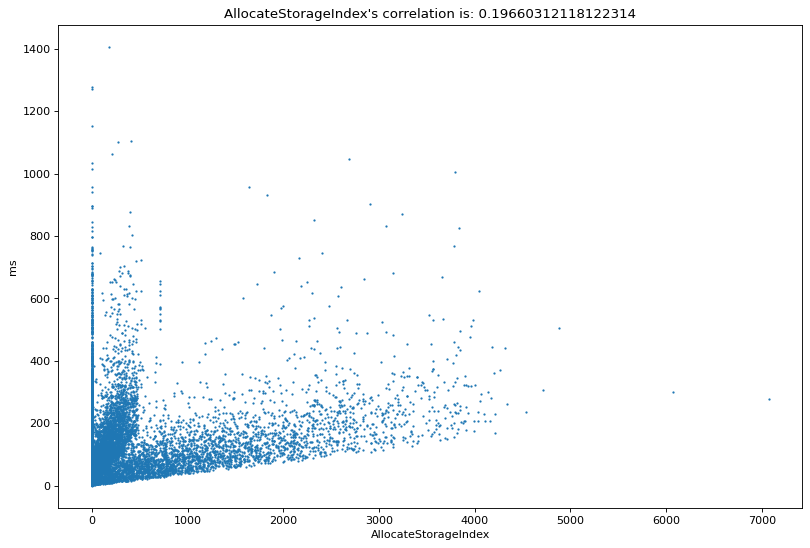

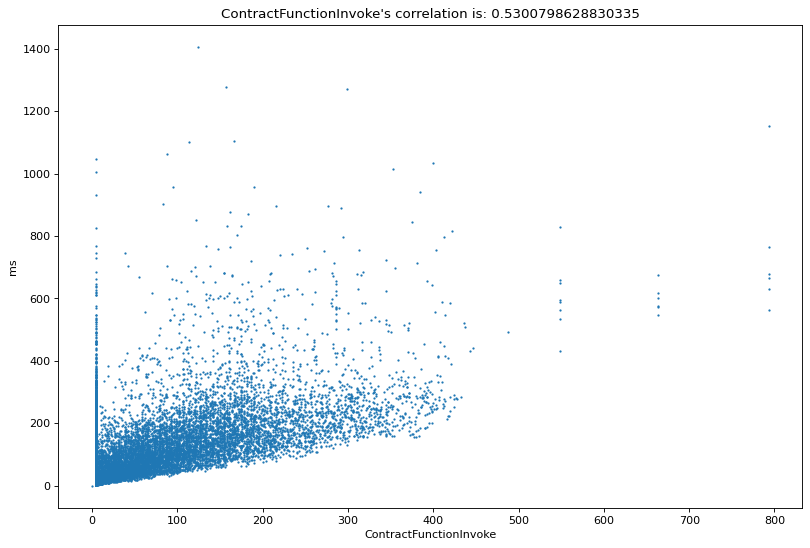

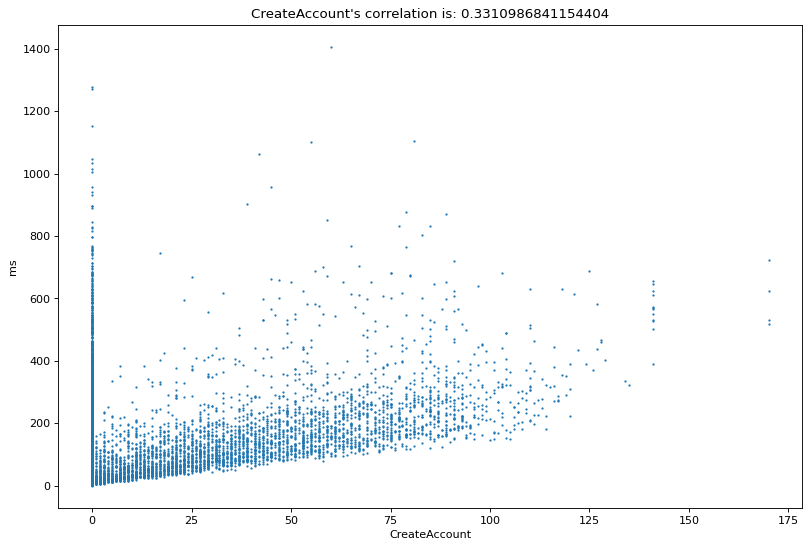

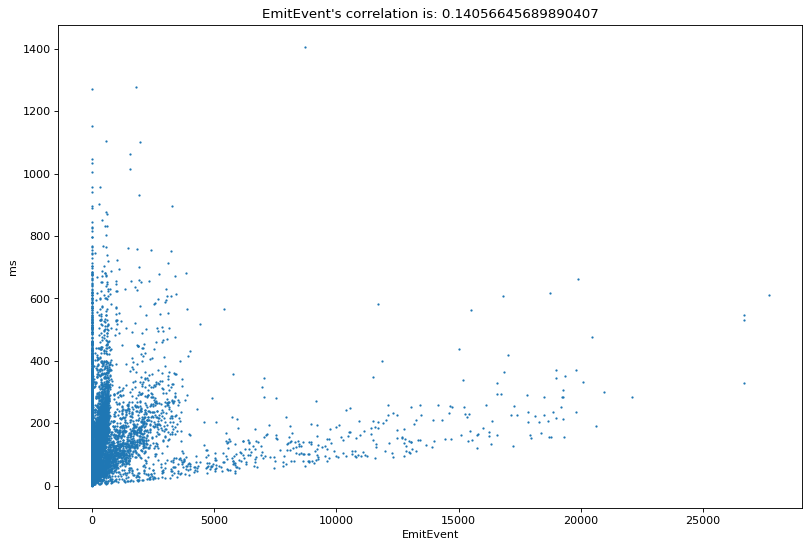

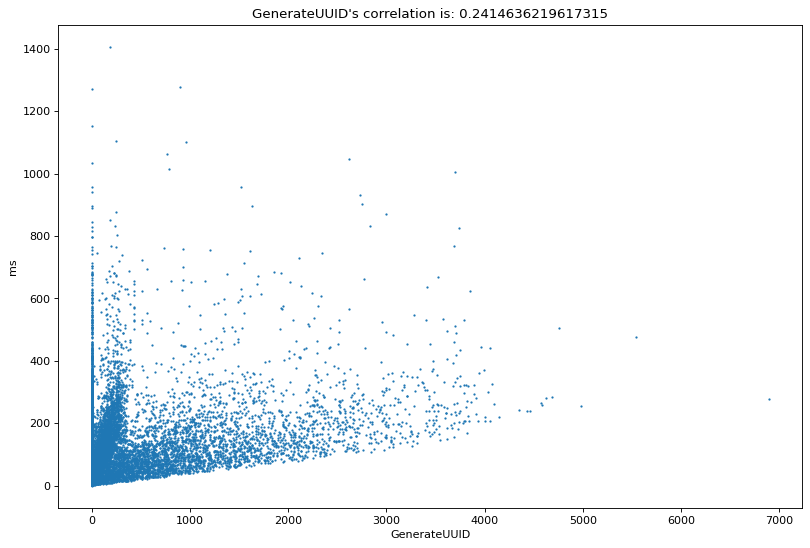

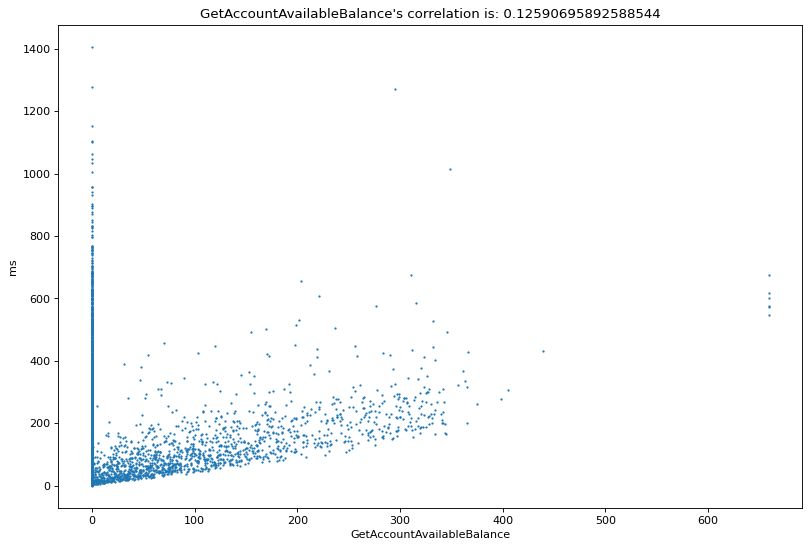

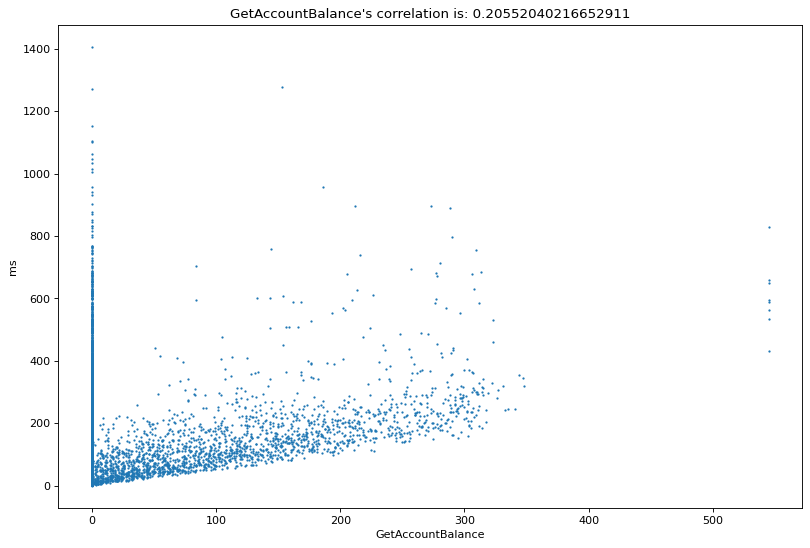

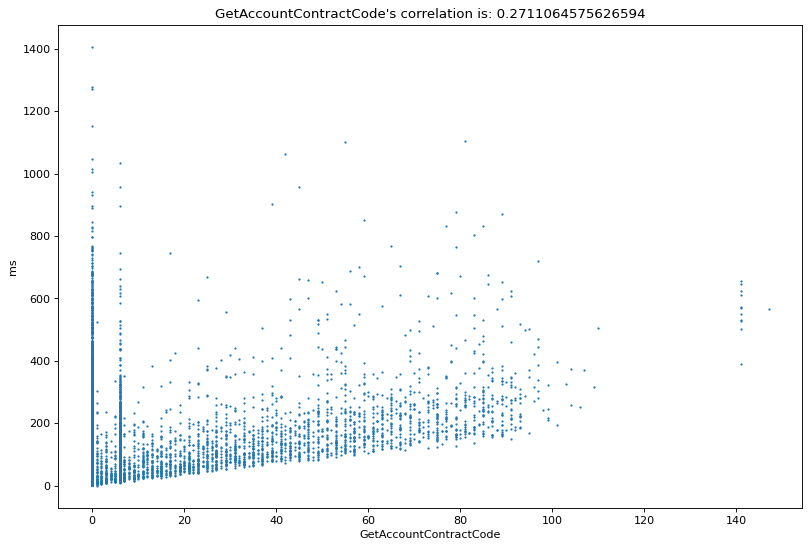

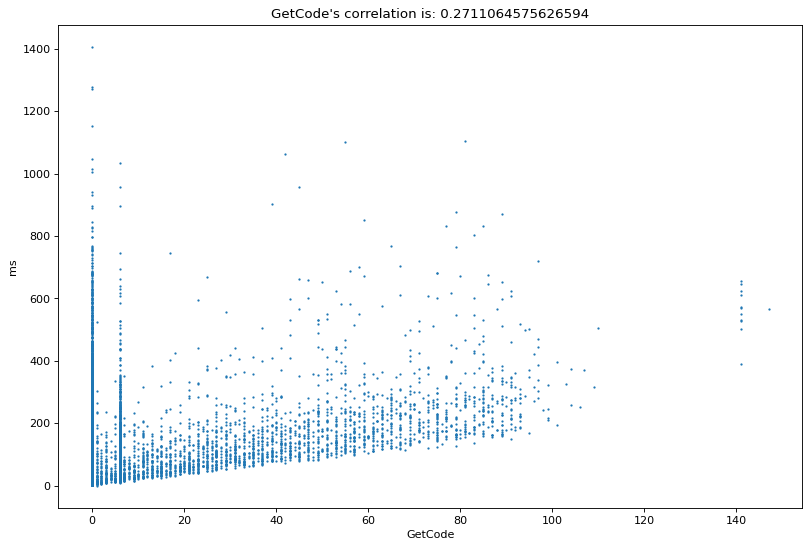

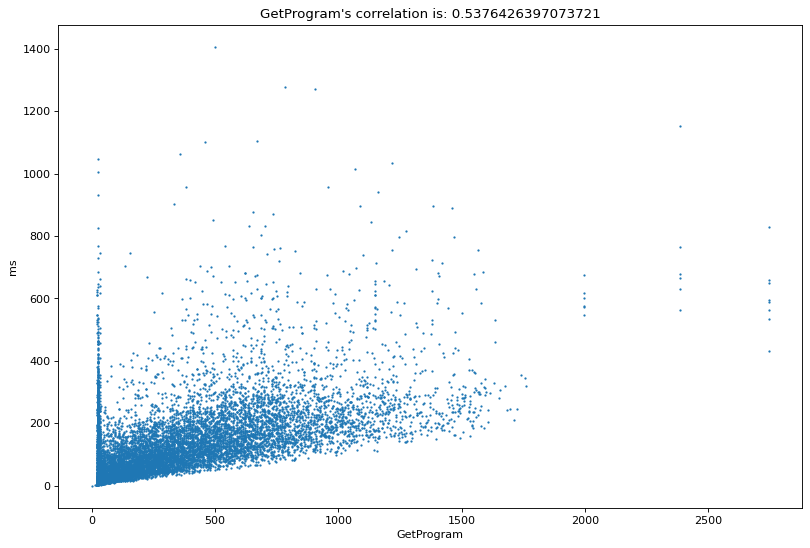

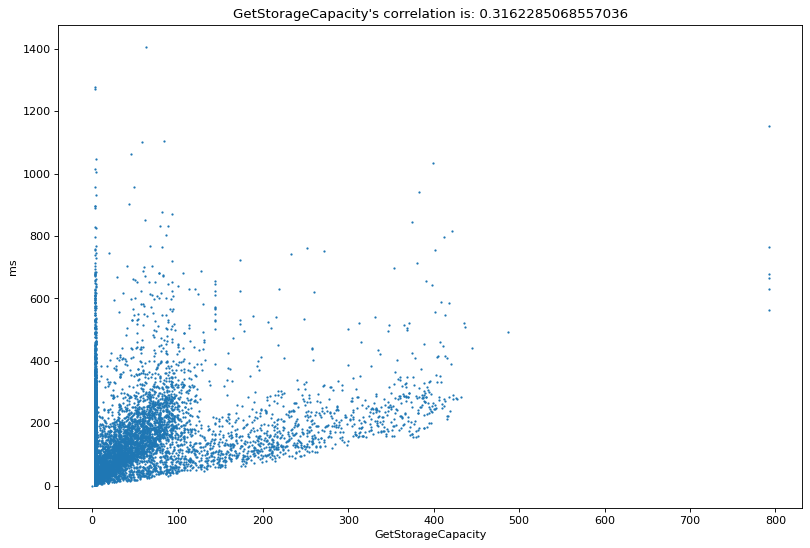

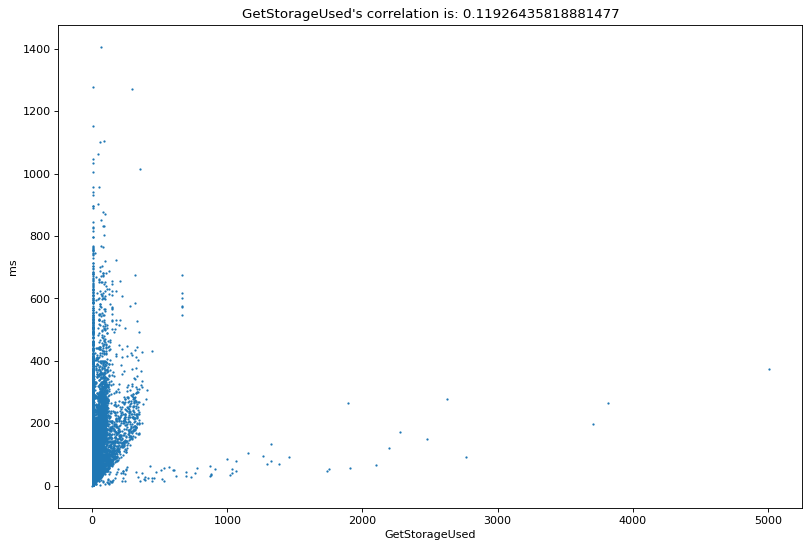

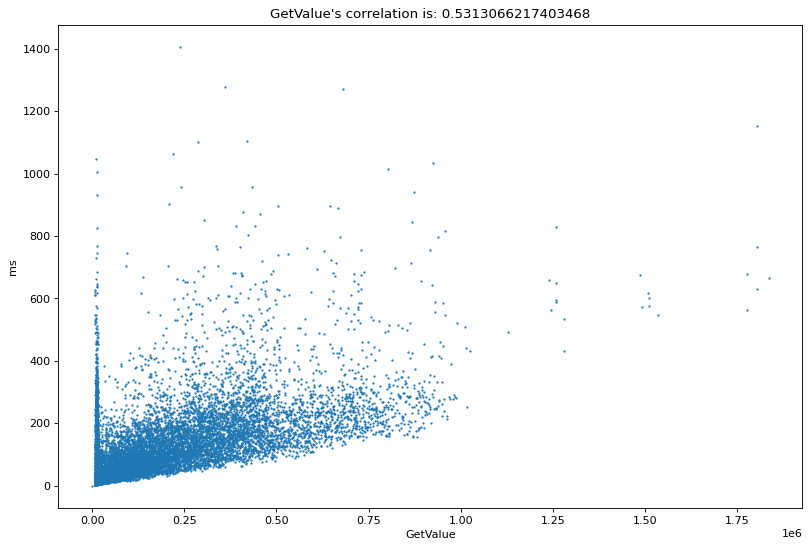

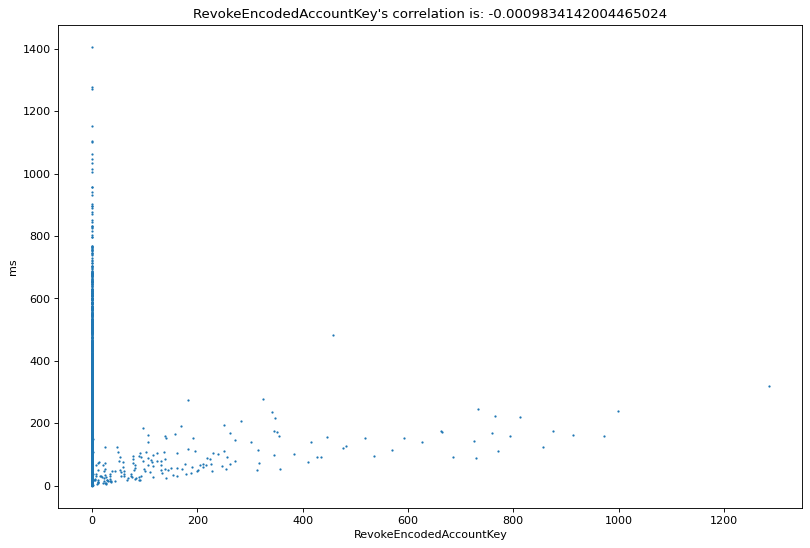

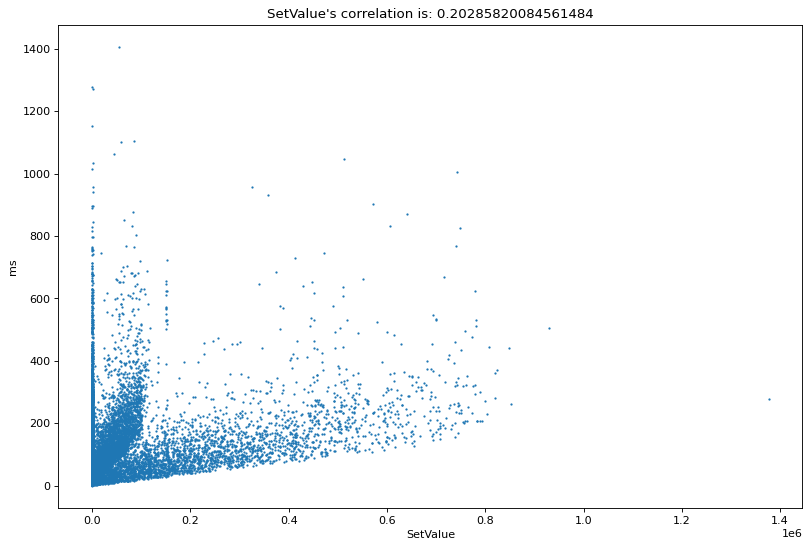

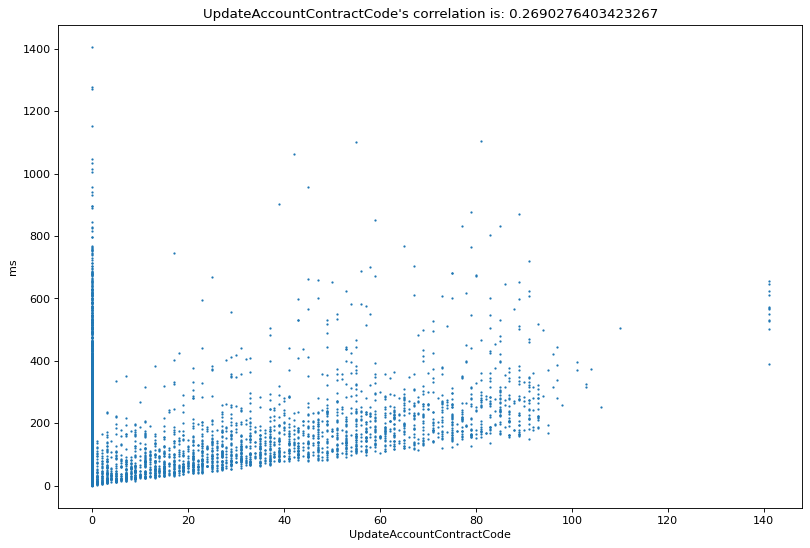

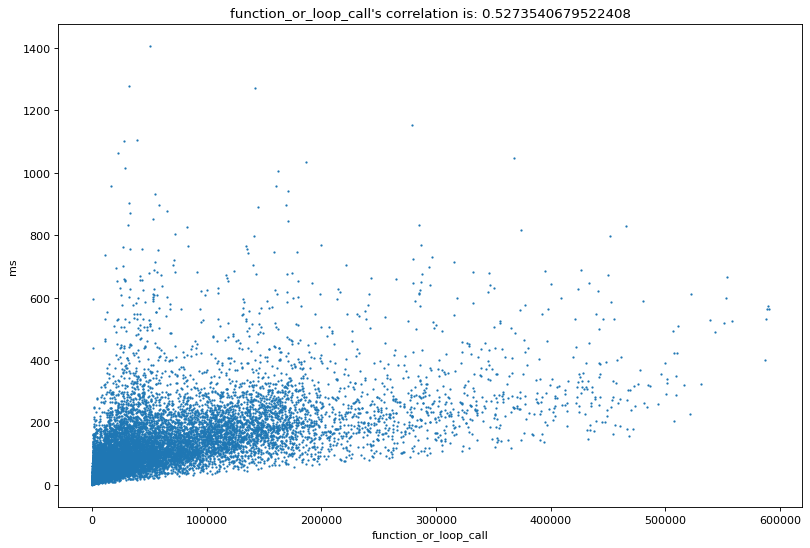

In [466]:
corr_out={}
plot_data=data4

features=plot_data.columns
removal=['tx','ResolveLocation','SetProgram','ProgramParsed','ValueDecoded','ProgramChecked','ms','source','index']
features=list(set(features)-set(removal))
    
for feature in sorted(features):
    fig=plt.figure(figsize=(12, 8), dpi=80)
    plt.xlabel(feature)
    plt.ylabel("ms")
    plt.scatter(plot_data[feature],plot_data.ms,s=1)
    corr, _ = pearsonr(plot_data[feature],plot_data.ms)
    corr_out[feature]=corr
    plt.title(feature+"'s correlation is: " + str(corr))
#     corr, _ = pearsonr(data[feature],data.ms)

    

# Data split

In [403]:
# X_train, X_test, y_train, y_test=model_selection.train_test_split(data.loc[:,data.columns[1:-1]],data.ms,test_size=0.2)
X_train, X_test, y_train, y_test=model_selection.train_test_split(data2.loc[:,features],data2.ms,test_size=0.2,random_state=10)

X_train2, X_test2, y_train2, y_test2=model_selection.train_test_split(data_no_outlier.loc[:,features],data_no_outlier.ms,test_size=0.2,random_state=10)

X_train3, X_test3, y_train3, y_test3=model_selection.train_test_split(data3.loc[:,features],data3.ms,test_size=0.2,random_state=10)
X_train31, X_test31, y_train31, y_test31=model_selection.train_test_split(data3_1.loc[:,features],data3_1.ms,test_size=0.2,random_state=10)
X_train32, X_test32, y_train32, y_test32=model_selection.train_test_split(data3_2.loc[:,features],data3_2.ms,test_size=0.2,random_state=10)

X_train4, X_test4, y_train4, y_test4=model_selection.train_test_split(data4.loc[:,features],data4.ms,test_size=0.2,random_state=10)


In [404]:
test=test.fillna(test.mean())

### Define features

In [405]:
model_features=list(data2.columns)
removal=['tx','ResolveLocation','SetProgram','ProgramParsed','ValueDecoded','ProgramChecked','ms','source','index','GetAccountBalance','GetAccountAvailableBalance']
model_features=list(set(model_features)-set(removal))

In [406]:
model_features

['EmitEvent',
 'GetStorageCapacity',
 'ContractFunctionInvoke',
 'GetCode',
 'AddEncodedAccountKey',
 'CreateAccount',
 'GetAccountContractCode',
 'function_or_loop_call',
 'RevokeEncodedAccountKey',
 'AllocateStorageIndex',
 'GetValue',
 'UpdateAccountContractCode',
 'GenerateUUID',
 'SetValue',
 'GetProgram',
 'GetStorageUsed']

# Linear model v0

In [408]:
selected_features=model_features
# X_train, X_test, y_train, y_test=model_selection.train_test_split(data.loc[:,selected_features],data.ms,test_size=0.2)
# X_train2=X_train[selected_features]
# X_test2=X_test[selected_features]
clf=linear_model.LinearRegression()
clf.fit(X_train[selected_features],y_train)

LinearRegression()

Text(0.5, 1.0, 'Model 1 R2:0.1972064892544001')

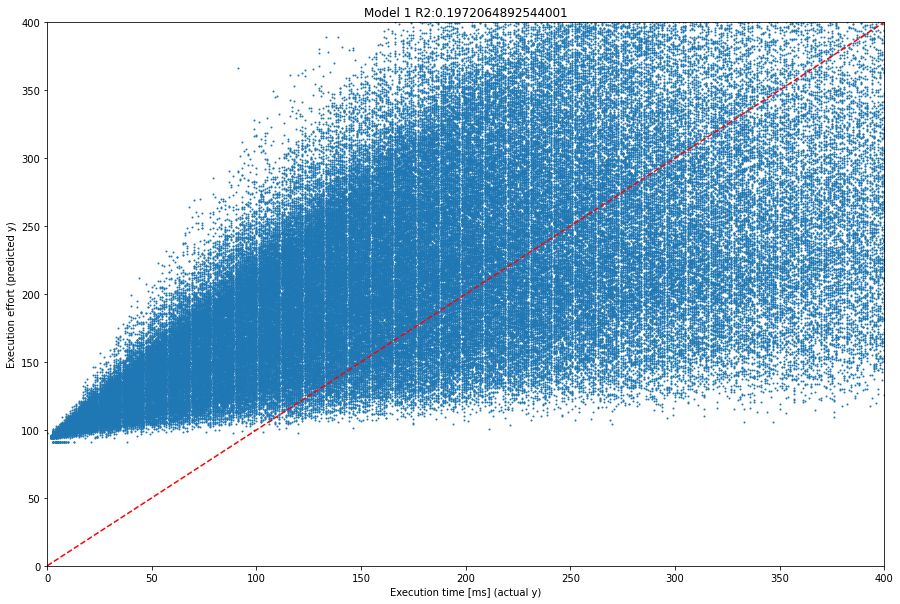

In [409]:
# plt.scatter(y_test,clf.predict(X_test))


diag = np.arange(0., 700., 10.)

fig, ax = plt.subplots(figsize=(15, 10))
ax.set(xlim=(0, 400),ylim=(0, 400))
ax.set_xlabel('Execution time [ms] (actual y)')
ax.set_ylabel('Execution effort (predicted y)')
plt.scatter(y_test,clf.predict(X_test[selected_features]), s=1)
plt.plot(diag, diag, 'r--')
plt.title ("Model 1 R2:" + str(clf.score(X_test[selected_features],y_test)))

# Linear model v1


In [410]:
# selected_features=['function_or_loop_call','GetValue','ValueDecoded','ProgramInterpreted','GetProgram']
# selected_features=data.columns[1:-1]
selected_features= [k for k,v in corr_out.items() if v>0.07]

In [411]:
# X_train, X_test, y_train, y_test=model_selection.train_test_split(data.loc[:,selected_features],data.ms,test_size=0.2)

In [412]:
clf=linear_model.Lasso(alpha=1,positive=True
                      )
clf.fit(X_train[selected_features],y_train)

/usr/local/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.727e+09, tolerance: 2.496e+06
  model = cd_fast.enet_coordinate_descent(


Lasso(alpha=1, positive=True)

In [413]:
print(clf.coef_)

[2.48436231e-02 0.00000000e+00 3.83496598e-01 7.64465925e-03
 1.94847619e-02 2.71925224e-02 2.31896142e-02 1.66591728e-01
 8.15117100e-14 4.59805368e-02 0.00000000e+00 3.64011048e-02
 1.10902934e-04 0.00000000e+00 0.00000000e+00 4.71357644e-04]


In [414]:
# print("train r2:" + str(clf.score(X_train[selected_features],y_train)))
# print("test r2:" + str(clf.score(X_test[selected_features],y_test)))

In [415]:
# print("train corr:" + str(pearsonr(clf.predict(X_train[selected_features]),y_train)[0]))
# print("test corr:" + str(pearsonr(clf.predict(X_test[selected_features]),y_test)[0]))

Text(0.5, 1.0, 'Model 1 R2:0.15846372567249256')

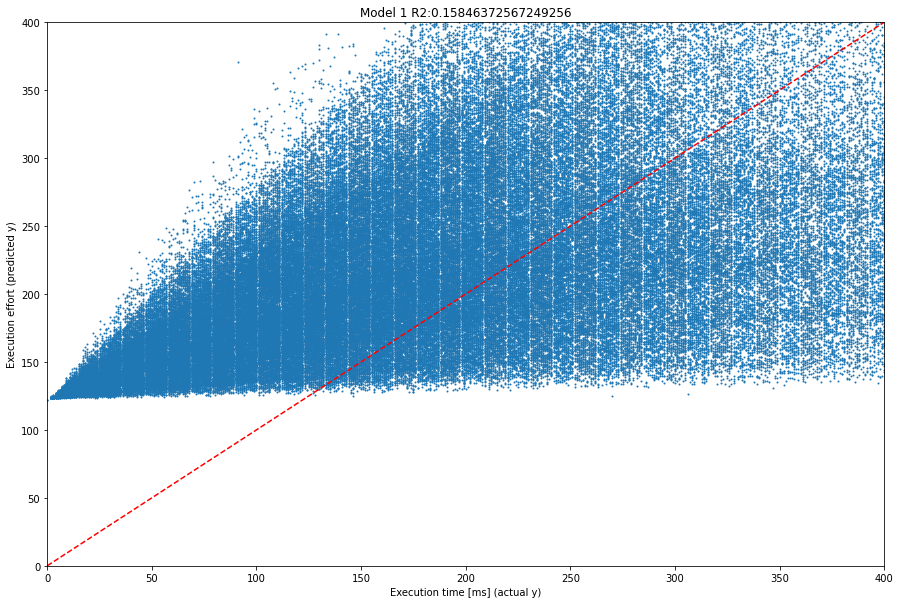

In [416]:
# plt.scatter(y_test,clf.predict(X_test))


diag = np.arange(0., 700., 10.)

fig, ax = plt.subplots(figsize=(15, 10))
ax.set(xlim=(0, 400),ylim=(0, 400))
ax.set_xlabel('Execution time [ms] (actual y)')
ax.set_ylabel('Execution effort (predicted y)')
plt.scatter(y_test,clf.predict(X_test[selected_features]), s=1)
plt.plot(diag, diag, 'r--')
plt.title ("Model 1 R2:" + str(clf.score(X_test[selected_features],y_test)))

# Linear Model v2

In [417]:
# selected_features=data.columns[1:-1]
selected_features= [k for k,v in corr_out.items() if v>0.07]
# X_train, X_test, y_train, y_test=model_selection.train_test_split(data_no_outlier.loc[:,selected_features],data_no_outlier.ms,test_size=0.2)

In [418]:
clf=linear_model.Lasso(alpha=1,\
                      positive=True
                      )

clf.fit(X_train2[selected_features],y_train2)

/usr/local/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.526e+08, tolerance: 8.243e+05
  model = cd_fast.enet_coordinate_descent(


Lasso(alpha=1, positive=True)

In [419]:
print(clf.coef_)

[1.48866684e-02 0.00000000e+00 4.08388535e-01 4.71402841e-03
 1.73220081e-02 1.73218938e-02 5.24451701e-02 9.55734927e-02
 0.00000000e+00 1.77790644e-02 0.00000000e+00 1.58233375e-02
 1.01473150e-04 0.00000000e+00 0.00000000e+00 3.86314847e-04]


In [420]:
# print("train r2:" + str(clf.score(X_train,y_train2)))
# print("test r2:" + str(clf.score(X_test,y_test2)))

In [421]:
# print("train corr:" + str(pearsonr(clf.predict(X_train),y_train)[0]))
# print("test corr:" + str(pearsonr(clf.predict(X_test),y_test)[0]))

Text(0.5, 1.0, 'Model 2 R2:0.25082133840764953')

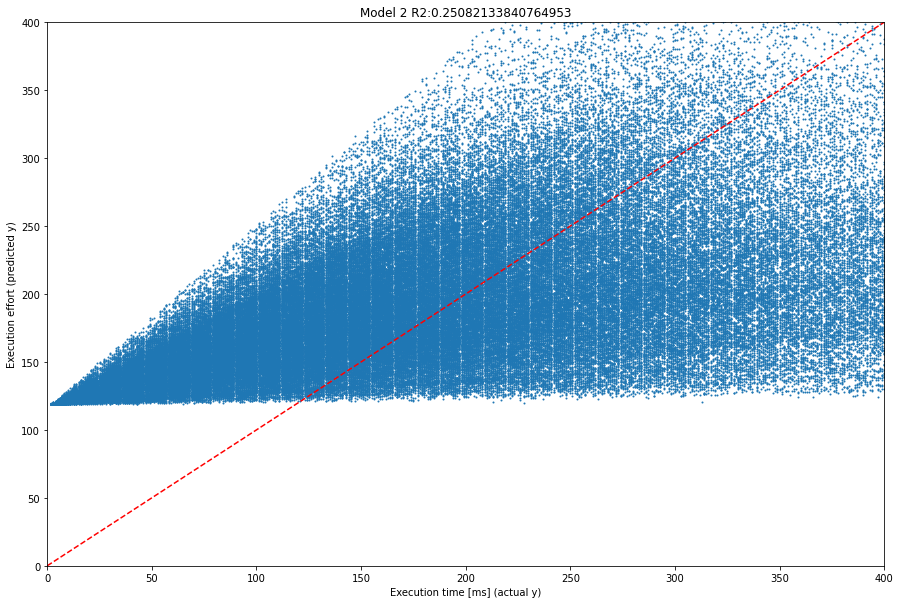

In [422]:
# plt.scatter(y_test,clf.predict(X_test))

diag = np.arange(0., 700., 10.)

fig, ax = plt.subplots(figsize=(15, 10))
ax.set(xlim=(0, 400),ylim=(0, 400))
ax.set_xlabel('Execution time [ms] (actual y)')
ax.set_ylabel('Execution effort (predicted y)')
plt.scatter(y_test2,clf.predict(X_test2[selected_features]), s=1)
plt.plot(diag, diag, 'r--')
plt.title ("Model 2 R2:" + str(clf.score(X_test2[selected_features],y_test2)))

# Linear model 3

In [423]:
features=[]
for i in range(len(selected_features)):
    if (clf.coef_!=0)[i]:
        features.append(selected_features[i])
features.remove('GetAccountBalance')
features.remove('GetProgram')
features.remove('GetAccountAvailableBalance')


In [424]:
# X2=sm.add_constant(X_train[features])
est=sm.OLS(y_train,X2)
est2 = est.fit()
print(est2.summary())

NameError: name 'X2' is not defined

In [ ]:
X2_test=sm.add_constant(X_test2[features])
# plt.scatter(est2.predict(X2_test),y_test)
diag = np.arange(0., 700., 10.)

fig, ax = plt.subplots(figsize=(15, 10))
ax.set(xlim=(0, 400),ylim=(0, 400))
ax.set_xlabel('Execution time [ms] (actual y)')
ax.set_ylabel('Execution effort (predicted y)')
plt.scatter(y_test2,est2.predict(X2_test), s=1)
plt.plot(diag, diag, 'r--')
plt.title ("Model 3 R2:" + str(pearsonr(est2.predict(X2_test),y_test2)[0]**2))

In [ ]:
pearsonr(est2.predict(X2_test),y_test)

In [ ]:
print("r2:" + str(0.5796279307474588**2))

In [ ]:
features

# Linear model 4 

In [ ]:
# selected_features=data.columns[1:-1]
selected_features= ['AddEncodedAccountKey',
 'ContractFunctionInvoke',
 'CreateAccount',
 'EmitEvent',
 'GenerateUUID',
 'GetAccountContractCode',
 'GetCode',
 'GetStorageUsed',
 'RevokeEncodedAccountKey',
 'ValueDecoded',
 'function_or_loop_call']
# X_train, X_test, y_train, y_test=model_selection.train_test_split(data_no_outlier.loc[:,selected_features],data_no_outlier.ms,test_size=0.2)

In [ ]:
clf=linear_model.LinearRegression(
                      positive=True
                      )
clf.fit(X_train2[selected_features],y_train2)

In [ ]:
print(clf.coef_)

In [ ]:
# print("train r2:" + str(clf.score(X_train2[selected_features],y_train)))
# print("test r2:" + str(clf.score(X_test2[selected_features],y_test)))

In [ ]:
# plt.scatter(est2.predict(X2_test),y_test)
diag = np.arange(0., 700., 10.)

fig, ax = plt.subplots(figsize=(15, 10))
ax.set(xlim=(0, 400),ylim=(0, 400))
ax.set_xlabel('Execution time [ms] (actual y)')
ax.set_ylabel('Execution effort (predicted y)')
plt.scatter(y_test2,clf.predict(X_test2[selected_features]), s=1)
plt.plot(diag, diag, 'r--')
plt.title ("Model 3 R2:" + str(clf.score(X_test2[selected_features],y_test2)))

# Linear Model v5

In [ ]:
selected_features=list(X_train)
# selected_features.remove('ms')
# selected_features.remove('tx')

# X_train, X_test, y_train, y_test=model_selection.train_test_split(data.loc[:,selected_features],data.ms,test_size=0.2)
# X_train2=X_train[selected_features]
# X_test2=X_test[selected_features]
clf=linear_model.Lasso(alpha=0.1,\
                      positive=True
                      )

clf.fit(X_train,y_train)

In [ ]:
print(clf.coef_)

In [ ]:
# plt.scatter(est2.predict(X2_test),y_test)
diag = np.arange(0., 700., 10.)

fig, ax = plt.subplots(figsize=(15, 10))
ax.set(xlim=(0, 400),ylim=(0, 400))
ax.set_xlabel('Execution time [ms] (actual y)')
ax.set_ylabel('Execution effort (predicted y)')
plt.scatter(y_test,clf.predict(X_test), s=1)
plt.plot(diag, diag, 'r--')
plt.title ("Model 3 R2:" + str(clf.score(X_test,y_test)))

# Linear Model v6 

In [ ]:
selected_features=list(X_train2)
# selected_features.remove('ms')
# selected_features.remove('tx')

# X_train, X_test, y_train, y_test=model_selection.train_test_split(data.loc[:,selected_features],data.ms,test_size=0.2)
# X_train2=X_train[selected_features]
# X_test2=X_test[selected_features]
clf2=linear_model.Lasso(alpha=10,\
                      positive=True
                      )

clf2.fit(X_train2,y_train2)

In [ ]:
X_train2, X_test2, y_train2, y_test2

In [ ]:
print(clf.coef_)

In [ ]:
# plt.scatter(est2.predict(X2_test),y_test)
diag = np.arange(0., 700., 10.)

fig, ax = plt.subplots(figsize=(15, 10))
ax.set(xlim=(0, 400),ylim=(0, 400))
ax.set_xlabel('Execution time [ms] (actual y)')
ax.set_ylabel('Execution effort (predicted y)')
plt.scatter(y_test2,clf2.predict(X_test2), s=1)
plt.plot(diag, diag, 'r--')
plt.title ("Model 3 R2:" + str(clf2.score(X_test2,y_test2)))

# Linear Model v7 - data3

In [392]:
selected_features=features
# X_train, X_test, y_train, y_test=model_selection.train_test_split(data.loc[:,selected_features],data.ms,test_size=0.2)
# X_train2=X_train[selected_features]
# X_test2=X_test[selected_features]
clf=linear_model.LinearRegression()
clf.fit(X_train3[selected_features],y_train3)

LinearRegression()

Text(0.5, 1.0, 'Model 1 R2:0.39235802475449777')

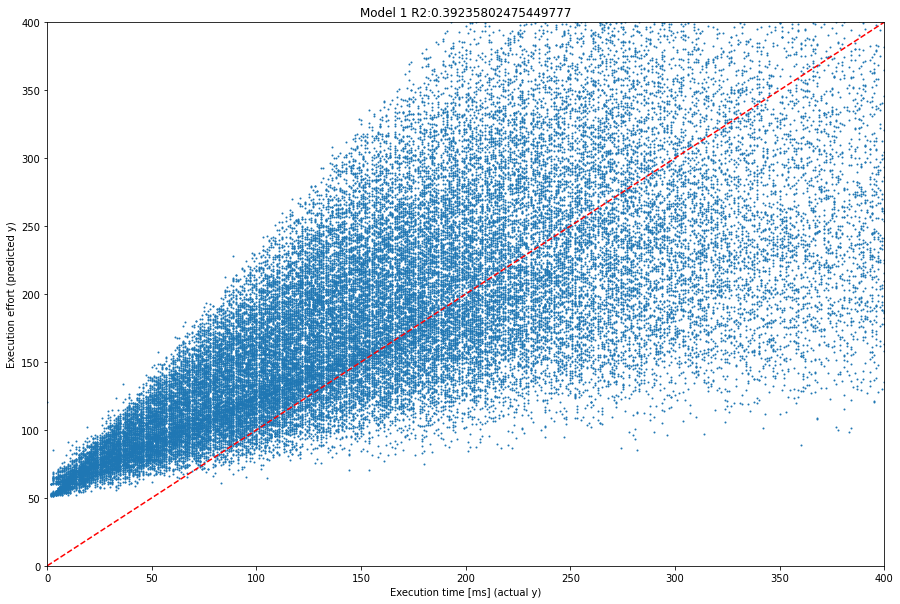

In [393]:
# plt.scatter(y_test,clf.predict(X_test))


diag = np.arange(0., 700., 10.)

fig, ax = plt.subplots(figsize=(15, 10))
ax.set(xlim=(0, 400),ylim=(0, 400))
ax.set_xlabel('Execution time [ms] (actual y)')
ax.set_ylabel('Execution effort (predicted y)')
plt.scatter(y_test3,clf.predict(X_test3[selected_features]), s=1)
plt.plot(diag, diag, 'r--')
plt.title ("Model 1 R2:" + str(clf.score(X_test3[selected_features],y_test3)))

# Linear Model v8 - data4

In [394]:
selected_features=model_features
# X_train, X_test, y_train, y_test=model_selection.train_test_split(data.loc[:,selected_features],data.ms,test_size=0.2)
# X_train2=X_train[selected_features]
# X_test2=X_test[selected_features]
clf=linear_model.LinearRegression()
clf.fit(X_train4[selected_features],y_train4)

LinearRegression()

In [395]:
clf.coef_

array([ 4.96984268e-03, -6.37981654e-02, -1.27795168e+00,  1.09396333e+00,
        6.71060418e-02,  1.15671382e+00,  1.09396333e+00,  5.52250695e-04,
        1.88029892e-02,  3.15412229e-02,  7.25721904e-04, -2.29306321e+00,
        1.01137900e-01, -4.48151154e-04,  4.28978654e-02,  2.09640873e-02])

Text(0.5, 1.0, 'Model 1 R2:0.663365003768952')

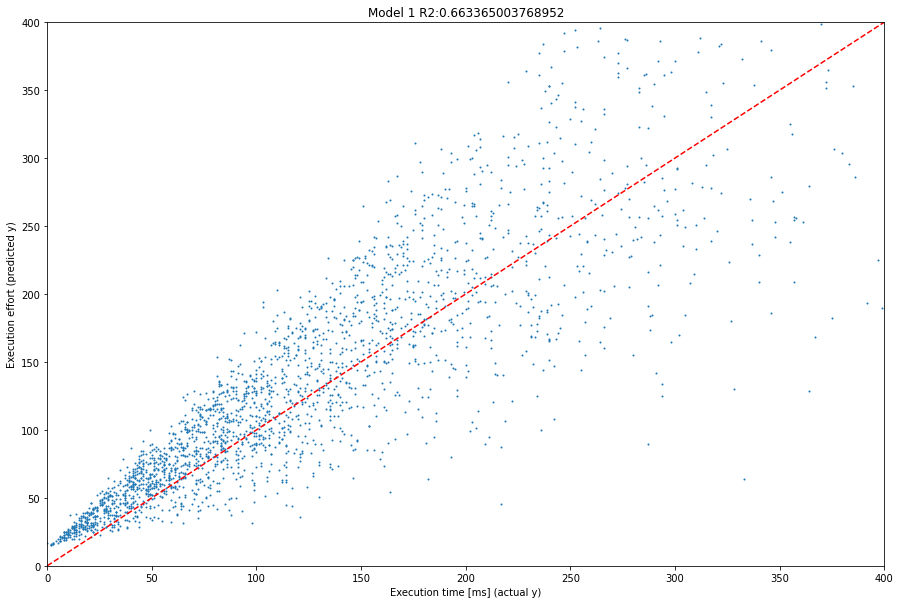

In [396]:
# plt.scatter(y_test,clf.predict(X_test))


diag = np.arange(0., 700., 10.)

fig, ax = plt.subplots(figsize=(15, 10))
ax.set(xlim=(0, 400),ylim=(0, 400))
ax.set_xlabel('Execution time [ms] (actual y)')
ax.set_ylabel('Execution effort (predicted y)')
plt.scatter(y_test4,clf.predict(X_test4[selected_features]), s=1)
plt.plot(diag, diag, 'r--')
plt.title ("Model 1 R2:" + str(clf.score(X_test4[selected_features],y_test4)))

In [397]:
pearsonr(clf.predict(test[selected_features]),test.ms)

(0.44176847519141416, 0.0)

Text(0.5, 1.0, 'Model 1 R2:-6.549446871770838')

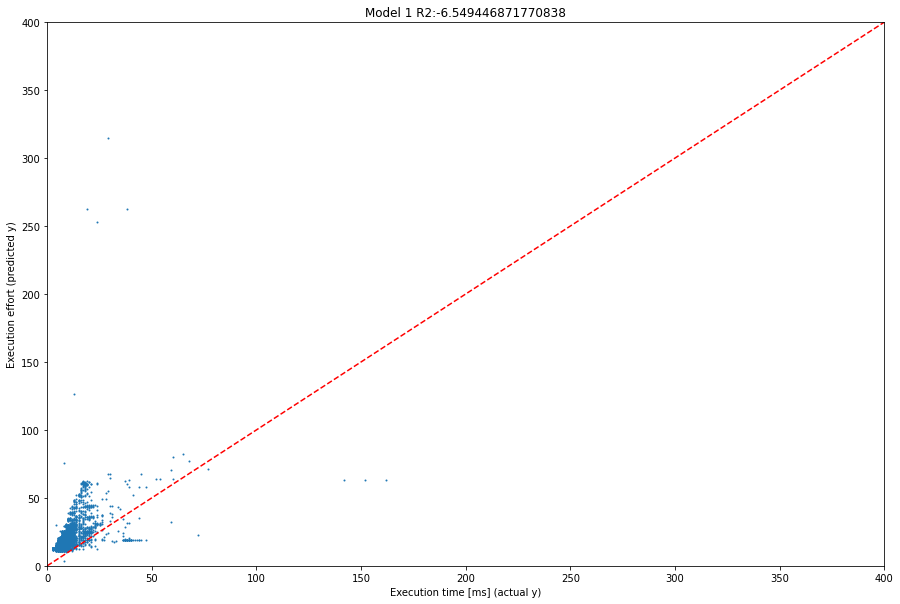

In [398]:
diag = np.arange(0., 700., 10.)

fig, ax = plt.subplots(figsize=(15, 10))
ax.set(xlim=(0, 400),ylim=(0, 400))
ax.set_xlabel('Execution time [ms] (actual y)')
ax.set_ylabel('Execution effort (predicted y)')
plt.scatter(test.ms,clf.predict(test[selected_features]), s=1)
plt.plot(diag, diag, 'r--')
plt.title ("Model 1 R2:" + str(clf.score(test[selected_features],test.ms)))

# Linear Model v9 - data3_1

In [ ]:
selected_features=features
# X_train, X_test, y_train, y_test=model_selection.train_test_split(data.loc[:,selected_features],data.ms,test_size=0.2)
# X_train2=X_train[selected_features]
# X_test2=X_test[selected_features]
clf=linear_model.LinearRegression()
clf.fit(X_train31[selected_features],y_train31)

In [ ]:
# plt.scatter(y_test,clf.predict(X_test))


diag = np.arange(0., 700., 10.)

fig, ax = plt.subplots(figsize=(15, 10))
ax.set(xlim=(0, 400),ylim=(0, 400))
ax.set_xlabel('Execution time [ms] (actual y)')
ax.set_ylabel('Execution effort (predicted y)')
plt.scatter(y_test31,clf.predict(X_test31[selected_features]), s=1)
plt.plot(diag, diag, 'r--')
plt.title ("Model 1 R2:" + str(clf.score(X_test31[selected_features],y_test31)))

# Linear Model v10 - data3_2

In [ ]:
selected_features=model_features
# X_train, X_test, y_train, y_test=model_selection.train_test_split(data.loc[:,selected_features],data.ms,test_size=0.2)
# X_train2=X_train[selected_features]
# X_test2=X_test[selected_features]
clf=linear_model.LinearRegression()
clf.fit(X_train32[selected_features],y_train32)

In [ ]:
# plt.scatter(y_test,clf.predict(X_test))


diag = np.arange(0., 700., 10.)

fig, ax = plt.subplots(figsize=(15, 10))
ax.set(xlim=(0, 400),ylim=(0, 400))
ax.set_xlabel('Execution time [ms] (actual y)')
ax.set_ylabel('Execution effort (predicted y)')
plt.scatter(y_test32,clf.predict(X_test32[selected_features]), s=1)
plt.plot(diag, diag, 'r--')
plt.title ("Model 1 R2:" + str(clf.score(X_test32[selected_features],y_test32)))

In [ ]:
pearsonr(clf.predict(test[selected_features]),test.ms)

In [ ]:
diag = np.arange(0., 700., 10.)

fig, ax = plt.subplots(figsize=(15, 10))
ax.set(xlim=(0, 50),ylim=(0, 50))
ax.set_xlabel('Execution time [ms] (actual y)')
ax.set_ylabel('Execution effort (predicted y)')
plt.scatter(test.ms,clf.predict(test[selected_features]), s=1)
plt.plot(diag, diag, 'r--')
plt.title ("Model 1 R2:" + str(clf.score(test[selected_features],test.ms)))

# Linear Model v11 - data4


In [ ]:
corr_out

In [399]:
selected_features= [k for k,v in corr_out.items() if v>0.2 and k in model_features]

# clf=linear_model.Lasso(alpha=0.1,\
#                       positive=True
#                       )
clf=linear_model.LinearRegression()

clf.fit(X_train4[selected_features],y_train4)

LinearRegression()

In [400]:
clf.coef_

array([-1.25372643e+00,  1.18077877e+00,  1.06233225e-01,  1.10663278e+00,
        1.10663278e+00,  3.21272169e-02, -8.34497097e-02,  7.38237811e-04,
       -3.14085795e-04, -2.26027782e+00,  5.40173420e-04])

Text(0.5, 1.0, 'Model 1 R2:0.6552645981515506')

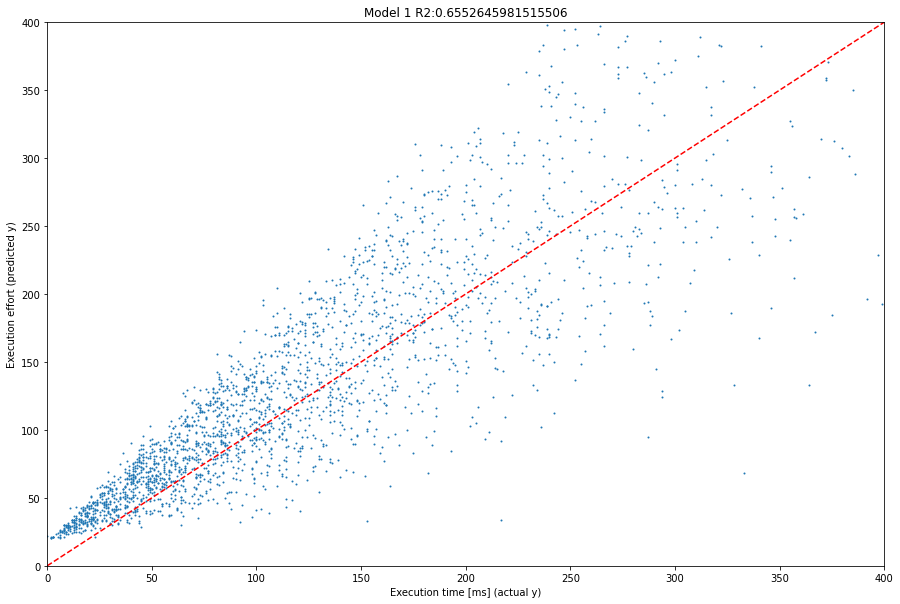

In [401]:
# plt.scatter(y_test,clf.predict(X_test))


diag = np.arange(0., 700., 10.)

fig, ax = plt.subplots(figsize=(15, 10))
ax.set(xlim=(0, 400),ylim=(0, 400))
ax.set_xlabel('Execution time [ms] (actual y)')
ax.set_ylabel('Execution effort (predicted y)')
plt.scatter(y_test4,clf.predict(X_test4[selected_features]), s=1)
plt.plot(diag, diag, 'r--')
plt.title ("Model 1 R2:" + str(clf.score(X_test4[selected_features],y_test4)))

In [ ]:
pearsonr(clf.predict(test[selected_features]),test.ms)

In [ ]:
diag = np.arange(0., 700., 10.)

fig, ax = plt.subplots(figsize=(15, 10))
ax.set(xlim=(0, 50),ylim=(0, 50))
ax.set_xlabel('Execution time [ms] (actual y)')
ax.set_ylabel('Execution effort (predicted y)')
plt.scatter(test.ms,clf.predict(test[selected_features]), s=1)
plt.plot(diag, diag, 'r--')
plt.title ("Model 1 R2:" + str(clf.score(test[selected_features],test.ms)))

# Linear Model v12

In [425]:
selected_features=model_features
# selected_features.remove('ms')
# selected_features.remove('tx')

# X_train, X_test, y_train, y_test=model_selection.train_test_split(data.loc[:,selected_features],data.ms,test_size=0.2)
# X_train2=X_train[selected_features]
# X_test2=X_test[selected_features]
clf=linear_model.Lasso(alpha=10,\
                      positive=True
                      )

clf.fit(X_train4[selected_features],y_train4)

Lasso(alpha=10, positive=True)

In [426]:
clf.coef_

array([6.24816012e-03, 0.00000000e+00, 0.00000000e+00, 5.06319402e-01,
       5.40969618e-02, 5.37348097e-01, 1.77978643e-04, 5.05728205e-04,
       1.87464688e-03, 0.00000000e+00, 1.20974881e-04, 0.00000000e+00,
       5.24549423e-02, 0.00000000e+00, 7.61121794e-02, 2.85053093e-02])

Text(0.5, 1.0, 'Model 1 R2:0.652364089322631')

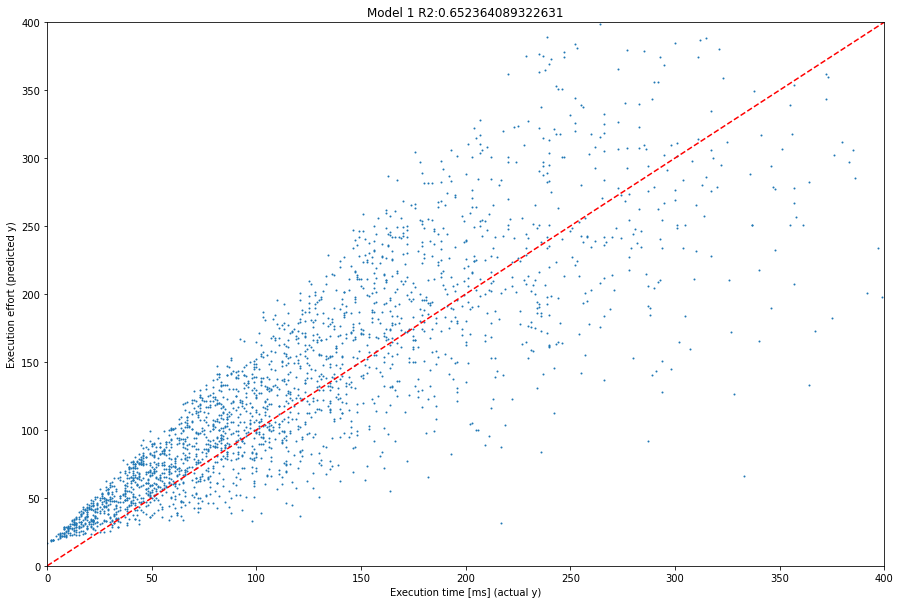

In [427]:
# plt.scatter(y_test,clf.predict(X_test))


diag = np.arange(0., 700., 10.)

fig, ax = plt.subplots(figsize=(15, 10))
ax.set(xlim=(0, 400),ylim=(0, 400))
ax.set_xlabel('Execution time [ms] (actual y)')
ax.set_ylabel('Execution effort (predicted y)')
plt.scatter(y_test4,clf.predict(X_test4[selected_features]), s=1)
plt.plot(diag, diag, 'r--')
plt.title ("Model 1 R2:" + str(clf.score(X_test4[selected_features],y_test4)))

In [431]:
pearsonr(clf.predict(test[selected_features]),test.ms)[0]**2

0.28675260330561725

Text(0.5, 1.0, 'Model 1 R2:-4.7325250114276916')

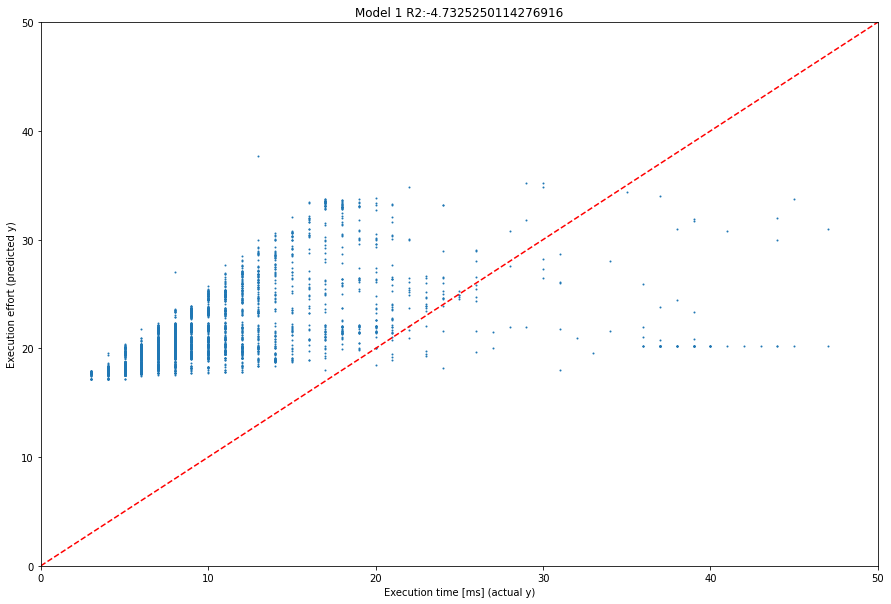

In [429]:
diag = np.arange(0., 700., 10.)

fig, ax = plt.subplots(figsize=(15, 10))
ax.set(xlim=(0, 50),ylim=(0, 50))
ax.set_xlabel('Execution time [ms] (actual y)')
ax.set_ylabel('Execution effort (predicted y)')
plt.scatter(test.ms,clf.predict(test[selected_features]), s=1)
plt.plot(diag, diag, 'r--')
plt.title ("Model 1 R2:" + str(clf.score(test[selected_features],test.ms)))

# Linear Model v13 - data4

In [438]:
corr_out

{'AddEncodedAccountKey': 0.007774530487666141,
 'AllocateStorageIndex': 0.19660312118122314,
 'ContractFunctionInvoke': 0.5300798628830335,
 'CreateAccount': 0.3310986841154404,
 'EmitEvent': 0.14056645689890407,
 'GenerateUUID': 0.2414636219617315,
 'GetAccountAvailableBalance': 0.12590695892588544,
 'GetAccountBalance': 0.20552040216652911,
 'GetAccountContractCode': 0.2711064575626594,
 'GetCode': 0.2711064575626594,
 'GetProgram': 0.5376426397073721,
 'GetStorageCapacity': 0.3162285068557036,
 'GetStorageUsed': 0.11926435818881477,
 'GetValue': 0.5313066217403468,
 'RevokeEncodedAccountKey': -0.0009834142004465024,
 'SetValue': 0.20285820084561484,
 'UpdateAccountContractCode': 0.2690276403423267,
 'function_or_loop_call': 0.5273540679522408}

In [448]:
selected_features= [k for k,v in corr_out.items() if v>0.2 and k in model_features]

# clf=linear_model.Lasso(alpha=0.1,\
#                       positive=True
#                       )

clf=linear_model.Lasso(alpha=10,\
                      positive=True
                      )

clf.fit(X_train4[selected_features],y_train4)

Lasso(alpha=10, positive=True)

In [449]:
clf.coef_

array([0.00000000e+00, 6.08858326e-01, 5.33034323e-02, 5.02175845e-01,
       3.06691889e-17, 7.16605702e-02, 0.00000000e+00, 1.33757484e-04,
       0.00000000e+00, 0.00000000e+00, 4.92205003e-04])

In [451]:
clf.feature_names_in_

array(['ContractFunctionInvoke', 'CreateAccount', 'GenerateUUID',
       'GetAccountContractCode', 'GetCode', 'GetProgram',
       'GetStorageCapacity', 'GetValue', 'SetValue',
       'UpdateAccountContractCode', 'function_or_loop_call'], dtype=object)

In [462]:
coefficients= {a:b for a,b in zip(clf.feature_names_in_,clf.coef_) if b!=0}
coefficients

{'CreateAccount': 0.6088583259288349,
 'GenerateUUID': 0.05330343232503861,
 'GetAccountContractCode': 0.502175844603492,
 'GetCode': 3.0669188939490816e-17,
 'GetProgram': 0.07166057015371416,
 'GetValue': 0.00013375748398192314,
 'function_or_loop_call': 0.0004922050026884043}

Text(0.5, 1.0, 'Model 1 R2:0.6453814454726806')

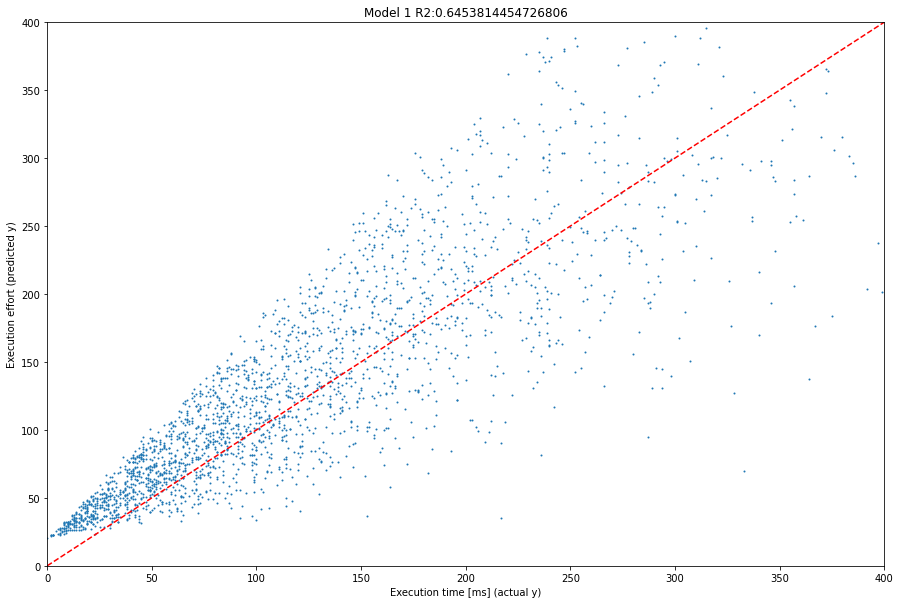

In [450]:
# plt.scatter(y_test,clf.predict(X_test))


diag = np.arange(0., 700., 10.)

fig, ax = plt.subplots(figsize=(15, 10))
ax.set(xlim=(0, 400),ylim=(0, 400))
ax.set_xlabel('Execution time [ms] (actual y)')
ax.set_ylabel('Execution effort (predicted y)')
plt.scatter(y_test4,clf.predict(X_test4[selected_features]), s=1)
plt.plot(diag, diag, 'r--')
plt.title ("Model 1 R2:" + str(clf.score(X_test4[selected_features],y_test4)))

Text(0.5, 1.0, 'Model 1 R2:0.2729845168376481')

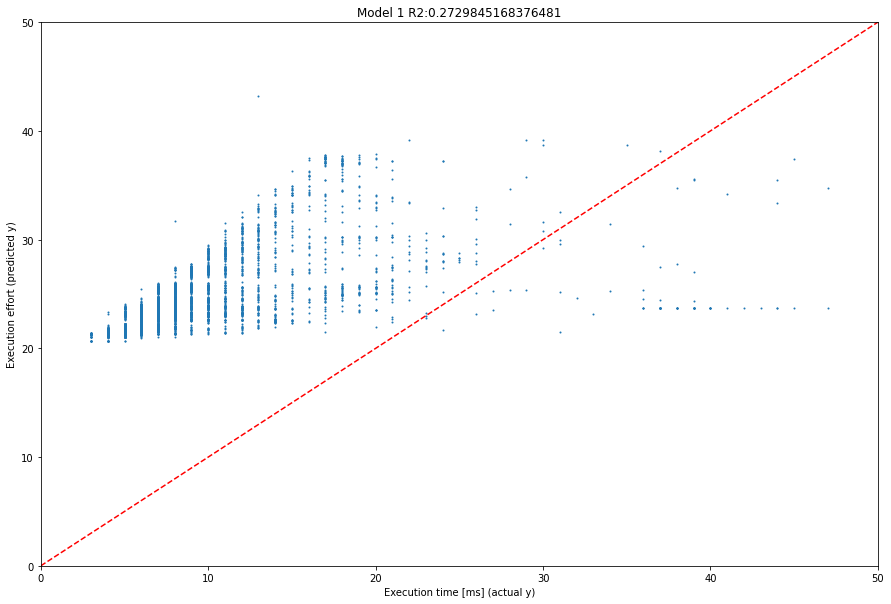

In [458]:
diag = np.arange(0., 700., 10.)

fig, ax = plt.subplots(figsize=(15, 10))
ax.set(xlim=(0, 50),ylim=(0, 50))
ax.set_xlabel('Execution time [ms] (actual y)')
ax.set_ylabel('Execution effort (predicted y)')
plt.scatter(test.ms,clf.predict(test[selected_features]), s=1)
plt.plot(diag, diag, 'r--')
plt.title ("Model 1 R2:" + str(pearsonr(clf.predict(test[selected_features]),test.ms)[0]**2))

In [456]:
pearsonr(clf.predict(test[selected_features]),test.ms)[0]**2

0.2729845168376481

In [464]:
data4[coefficients.keys()].corr('pearson')

CreateAccount  GenerateUUID  GetAccountContractCode  \
CreateAccount                1.000000     -0.001390                0.708952   
GenerateUUID                -0.001390      1.000000                0.025999   
GetAccountContractCode       0.708952      0.025999                1.000000   
GetCode                      0.708952      0.025999                1.000000   
GetProgram                   0.270659     -0.236753                0.178805   
GetValue                     0.218319     -0.235585                0.194810   
function_or_loop_call        0.079571      0.085243               -0.008942   

                         GetCode  GetProgram  GetValue  function_or_loop_call  
CreateAccount           0.708952    0.270659  0.218319               0.079571  
GenerateUUID            0.025999   -0.236753 -0.235585               0.085243  
GetAccountContractCode  1.000000    0.178805  0.194810              -0.008942  
GetCode                 1.000000    0.178805  0.194810              -0.008942  
GetProgram              0.178805    1.000000  0.953765               0.312535  
GetValue                0.194810    0.953765  1.000000               0.303343  
function_or_loop_call  -0.008942    0.312535  0.303343               1.000000

SetValue instead of GenerateUUID
GetValue instaed of GetProgram
dont keep ContractFunctionInvoke
keep createAccount

# Discussion


0. split data to train and test

0.1 exploratory data analysis

1. Does not start at the origin.

```
data quality. why some txn has quite different ms when all other features are similar? refer to univarite plot
missing variable or some data is wrong
```

In [ ]:
data.loc[data.ms<=10].head(1)

2.Some features have negative weights. This is very unsafe, as it can be exploited.

```
the current data exhibit a negative relationship. we can force it though. can we keep negative weights?
```

3.Graph has lines where deta is denser, this is due to the properties of the error of execution time and the fact that there are transactions of different types.
```
missing variables or some data is wrong. some txn has much longer execution time
```

4. Overall it has data quality issue
- 4.1 need help to remove some outliers
- 4.2 can txn type be categorized to fewer groups , 577 now instead of 25. what are mixed transactions. can 3 mixed in reality?
- 4.2 need to get more data

- 4.3 what is the best source of data - mainet, testnet?

 

In [ ]:
data.shape

In [ ]:
100k

In [ ]:
1. 100k raw records from testnet
2. try to collect data from different nodes
3. 20k from mainnet as test dataset
4. help identify outliers
5. insights about must and not-to-use features - function_or_loop_call
